# This notebook is to plot the gen-reco-comparison plots in W and top selection old samples.

In [1]:
import ROOT
import array as array
import os
import glob
import ROOT
from ROOT import TH1D, TH2D, TTree,TFile, TUnfoldSys, TUnfoldDensity, TUnfold, TDirectoryFile
from random import gauss
import numpy as np
import root_numpy as rtnpy
import h5py
from awkward import JaggedArray, Table
import matplotlib.pyplot as plt
import seaborn as sns

Welcome to JupyROOT 6.14/09


In [2]:
lumi=5750+2573+4242+4025+3104+7576+8632
print lumi
CrossSection=np.array([509.9,730.6,10.12,136.02,80.95,38.06,38.09,60450])
EventNumber=np.array([7662481,76489216,30289975.2,37877067,66826980,998276,992024,611509190272])
Scale=lumi*CrossSection/EventNumber
print Scale
MC_Compo=np.array(['TTJets_madgraph','TT_powheg','SingleTop_s-channel','SingleTop_t-channel-antitop','SingleTop_t-channel-top','SingleTop_tW-antitop','SingleTop_tW-top',"WJets"])


35902
[2.38909954 0.34292417 0.011995   0.12892735 0.04348942 1.36878991
 1.37850211 0.00354905]


In [3]:
fMC=['/t3home/algomez/work/Files/jetObservables/v02/jetObservables_histograms_TTJets_TuneCUETP8M1_13TeV-madgraphMLM-pythia8.root',
     '/t3home/algomez/work/Files/jetObservables/v02/jetObservables_histograms_TT_TuneCUETP8M2T4_13TeV-powheg-pythia8.root',
     '/t3home/algomez/work/Files/jetObservables/v02/jetObservables_histograms_ST_s-channel_4f_InclusiveDecays_13TeV-amcatnlo-pythia8.root',
     '/t3home/algomez/work/Files/jetObservables/v02/jetObservables_histograms_ST_t-channel_antitop_4f_inclusiveDecays_13TeV-powhegV2-madspin-pythia8_TuneCUETP8M1.root',
     '/t3home/algomez/work/Files/jetObservables/v02/jetObservables_histograms_ST_t-channel_top_4f_inclusiveDecays_13TeV-powhegV2-madspin-pythia8_TuneCUETP8M1.root',
     '/t3home/algomez/work/Files/jetObservables/v02/jetObservables_histograms_ST_tW_antitop_5f_inclusiveDecays_13TeV-powheg-pythia8_TuneCUETP8M2T4.root',
     '/t3home/algomez/work/Files/jetObservables/v02/jetObservables_histograms_ST_tW_top_5f_inclusiveDecays_13TeV-powheg-pythia8_TuneCUETP8M2T4.root',
     '/t3home/algomez/work/Files/jetObservables/v02/jetObservables_histograms_WJetsToLNu_TuneCUETP8M1_13TeV-amcatnloFXFX-pythia8.root'
    ]

print len(fMC)

8


In [4]:
F=ROOT.TFile.Open(fMC[0],'read')
T=F.Get("jetObservables")
T.ls()

TDirectoryFile*		jetObservables	jetObservables
 KEY: TH1F	cutflow_reco;1	
 KEY: TH1F	cutflow_gen;1	
 KEY: TH1F	cutflowWeight_reco;1	
 KEY: TH1F	cutflowWeight_gen;1	
 KEY: TH1F	PUweight;1	
 KEY: TH1F	Lepweight;1	
 KEY: TH1F	nPVs_noSelnoWeight;1	
 KEY: TH1F	nleps_noSelnoWeight;1	
 KEY: TH1F	muons_pt_noSelnoWeight;1	muons
 KEY: TH1F	muons_eta_noSelnoWeight;1	muons
 KEY: TH1F	muons_phi_noSelnoWeight;1	muons
 KEY: TH1F	muons_mass_noSelnoWeight;1	muons
 KEY: TH1F	eles_pt_noSelnoWeight;1	eles
 KEY: TH1F	eles_eta_noSelnoWeight;1	eles
 KEY: TH1F	eles_phi_noSelnoWeight;1	eles
 KEY: TH1F	eles_mass_noSelnoWeight;1	eles
 KEY: TH1F	nAK8jets_noSelnoWeight;1	
 KEY: TH1F	AK8jets_pt_noSelnoWeight;1	AK8jets
 KEY: TH1F	AK8jets_eta_noSelnoWeight;1	AK8jets
 KEY: TH1F	AK8jets_phi_noSelnoWeight;1	AK8jets
 KEY: TH1F	AK8jets_mass_noSelnoWeight;1	AK8jets
 KEY: TH1F	nAK4jets_noSelnoWeight;1	
 KEY: TH1F	AK4jets_pt_noSelnoWeight;1	AK4jets
 KEY: TH1F	AK4jets_eta_noSelnoWeight;1	AK4jets
 KEY: TH1F	AK4jets_phi_noSelno

In [5]:
Objects_topSel=np.array([
    'respJetTau21_nom_topSel',
    'respJet_tau_0p5_0_nom_topSel', 'respJet_tau_1_0_nom_topSel', 'respJet_tau_2_0_nom_topSel',
    'respJet_tau_0p5_1_nom_topSel', 'respJet_tau_1_1_nom_topSel', 'respJet_tau_2_1_nom_topSel',
    'respJet_tau_0p5_2_nom_topSel', 'respJet_tau_1_2_nom_topSel', 'respJet_tau_2_2_nom_topSel',
    'respJet_tau_0p5_3_nom_topSel', 'respJet_tau_1_3_nom_topSel', 'respJet_tau_2_3_nom_topSel',
    'respJet_tau_0p5_4_nom_topSel', 'respJet_tau_1_4_nom_topSel', 'respJet_tau_2_4_nom_topSel',
])
Objects_WSel=np.array([
    'respJetTau21_nom_WSel',
    'respJet_tau_0p5_0_nom_WSel', 'respJet_tau_1_0_nom_WSel', 'respJet_tau_2_0_nom_WSel',
    'respJet_tau_0p5_1_nom_WSel', 'respJet_tau_1_1_nom_WSel', 'respJet_tau_2_1_nom_WSel',
    'respJet_tau_0p5_2_nom_WSel', 'respJet_tau_1_2_nom_WSel', 'respJet_tau_2_2_nom_WSel',
    'respJet_tau_0p5_3_nom_WSel', 'respJet_tau_1_3_nom_WSel', 'respJet_tau_2_3_nom_WSel',
    'respJet_tau_0p5_4_nom_WSel', 'respJet_tau_1_4_nom_WSel', 'respJet_tau_2_4_nom_WSel',
])
Title_WSel=np.array([
    ['Events/0.05','#tau_{21}','#tau_{21}'],
    ['Events/0.03','#tau_{1}^{(0.5)}','#tau_{1}^{(0.5)}'],['Events/0.02','#tau_{1}^{(1)}','#tau_{1}^{(1)}'],['Events/0.02','#tau_{1}^{(2)}','#tau_{1}^{(2)}'],
    ['Events/0.03','#tau_{2}^{(0.5)}','#tau_{2}^{(0.5)}'],['Events/0.02','#tau_{2}^{(1)}','#tau_{2}^{(1)}'],['Events/0.01','#tau_{2}^{(2)}','#tau_{2}^{(2)}'],
    ['Events/0.02','#tau_{3}^{(0.5)}','#tau_{3}^{(0.5)}'],['Events/0.02','#tau_{3}^{(1)}','#tau_{3}^{(1)}'],['Events/0.01','#tau_{3}^{(2)}','#tau_{3}^{(2)}'],
    ['Events/0.02','#tau_{4}^{(0.5)}','#tau_{4}^{(0.5)}'],['Events/0.01','#tau_{4}^{(1)}','#tau_{4}^{(1)}'],['Events/0.01','#tau_{4}^{(2)}','#tau_{4}^{(2)}'],
    ['Events/0.02','#tau_{5}^{(0.5)}','#tau_{5}^{(0.5)}'],['Events/0.01','#tau_{5}^{(1)}','#tau_{5}^{(1)}'],['Events/0.01','#tau_{5}^{(2)}','#tau_{5}^{(2)}'],
])
Title_topSel=np.array([
    ['Events/0.05','#tau_{21}','#tau_{21}'],
    ['Events/0.03','#tau_{1}^{(0.5)}','#tau_{1}^{(0.5)}'],['Events/0.03','#tau_{1}^{(1)}','#tau_{1}^{(1)}'],['Events/0.02','#tau_{1}^{(2)}','#tau_{1}^{(2)}'],
    ['Events/0.03','#tau_{2}^{(0.5)}','#tau_{2}^{(0.5)}'],['Events/0.02','#tau_{2}^{(1)}','#tau_{2}^{(1)}'],['Events/0.01','#tau_{2}^{(2)}','#tau_{2}^{(2)}'],
    ['Events/0.02','#tau_{3}^{(0.5)}','#tau_{3}^{(0.5)}'],['Events/0.02','#tau_{3}^{(1)}','#tau_{3}^{(1)}'],['Events/0.01','#tau_{3}^{(2)}','#tau_{3}^{(2)}'],
    ['Events/0.02','#tau_{4}^{(0.5)}','#tau_{4}^{(0.5)}'],['Events/0.01','#tau_{4}^{(1)}','#tau_{4}^{(1)}'],['Events/0.01','#tau_{4}^{(2)}','#tau_{4}^{(2)}'],
    ['Events/0.02','#tau_{5}^{(0.5)}','#tau_{5}^{(0.5)}'],['Events/0.01','#tau_{5}^{(1)}','#tau_{5}^{(1)}'],['Events/0.01','#tau_{5}^{(2)}','#tau_{5}^{(2)}'],
])
Range_WSel=[
    [20,0,1],
    [30,0,0.9],[35,0,0.7],[20,0,0.4],
    [20,0,0.6],[20,0,0.4],[20,0,0.2],
    [25,0,0.5],[20,0,0.4],[10,0,0.1],
    [20,0,0.4],[20,0,0.2],[10,0,0.1],
    [20,0,0.4],[20,0,0.2],[10,0,0.1],
]
Range_topSel=[
    [20,0,1],
    [30,0,0.9],[20,0,0.6],[20,0,0.4],
    [20,0,0.6],[20,0,0.4],[20,0,0.2],
    [20,0,0.4],[20,0,0.4],[10,0,0.1],
    [20,0,0.4],[20,0,0.2],[10,0,0.1],
    [20,0,0.4],[20,0,0.2],[10,0,0.1],
]

# Functions to refill histograms with new binnings

In [6]:
def Bin(Range):
    bins=np.array([x for x in np.linspace(num=Range[0]+1,start=Range[1],stop=Range[2])])
    return bins
def Fill1D(h0,h,bins):
    N=h0.GetNbinsX()
    content=np.zeros((len(bins)-1),dtype=float)
    for i in range(len(bins)-1):
        content[i]=0
    for i in range(N):
        center=h0.GetBinCenter(i+1)
        index=np.digitize(np.array([center]),bins)
        if index[0] < len(bins):
            content[index[0]-1]+=h0.GetBinContent(i+1)
    for i in range(len(bins)-1):
        h.SetBinContent(i+1,content[i])

# Read histograms from files and refill them

In [7]:
f_MC=np.zeros((len(fMC),),dtype=ROOT.TFile)
Reco_Mad_WSel=[]
Gen_Mad_WSel=[]
Reco_Pow_WSel=[]
Gen_Pow_WSel=[]
Reco_Mad_topSel=[]
Gen_Mad_topSel=[]
Reco_Pow_topSel=[]
Gen_Pow_topSel=[]
l=len(Objects_WSel)

i=0
f_MC[i]=ROOT.TFile.Open(fMC[i],'read')
t=f_MC[i].Get('jetObservables')
for j in range(l):
    hist=ROOT.TH1F("",";;",*Range_WSel[j])
    Fill1D(t.Get(Objects_WSel[j]).ProjectionX(),hist,Bin(Range_WSel[j]))
    hist.Scale(Scale[i])
    Gen_Mad_WSel.append(hist)
    hist=ROOT.TH1F("",";;",*Range_WSel[j])
    Fill1D(t.Get(Objects_WSel[j]).ProjectionY(),hist,Bin(Range_WSel[j]))
    hist.Scale(Scale[i])
    Reco_Mad_WSel.append(hist)
    hist=ROOT.TH1F("",";;",*Range_topSel[j])
    Fill1D(t.Get(Objects_topSel[j]).ProjectionX(),hist,Bin(Range_topSel[j]))
    hist.Scale(Scale[i])
    Gen_Mad_topSel.append(hist)
    hist=ROOT.TH1F("",";;",*Range_topSel[j])
    Fill1D(t.Get(Objects_topSel[j]).ProjectionY(),hist,Bin(Range_topSel[j]))
    hist.Scale(Scale[i])
    Reco_Mad_topSel.append(hist)

i=1
f_MC[i]=ROOT.TFile.Open(fMC[i],'read')
t=f_MC[i].Get('jetObservables')
for j in range(l):
    hist=ROOT.TH1F("",";;",*Range_WSel[j])
    Fill1D(t.Get(Objects_WSel[j]).ProjectionX(),hist,Bin(Range_WSel[j]))
    hist.Scale(Scale[i])
    Gen_Pow_WSel.append(hist)
    hist=ROOT.TH1F("",";;",*Range_WSel[j])
    Fill1D(t.Get(Objects_WSel[j]).ProjectionY(),hist,Bin(Range_WSel[j]))
    hist.Scale(Scale[i])
    Reco_Pow_WSel.append(hist)
    hist=ROOT.TH1F("",";;",*Range_topSel[j])
    Fill1D(t.Get(Objects_topSel[j]).ProjectionX(),hist,Bin(Range_topSel[j]))
    hist.Scale(Scale[i])
    Gen_Pow_topSel.append(hist)
    hist=ROOT.TH1F("",";;",*Range_topSel[j])
    Fill1D(t.Get(Objects_topSel[j]).ProjectionY(),hist,Bin(Range_topSel[j]))
    hist.Scale(Scale[i])
    Reco_Pow_topSel.append(hist)

for i in range(2,len(fMC)-1):
    f_MC[i]=ROOT.TFile.Open(fMC[i],'read')
    t=f_MC[i].Get('jetObservables')
    for j in range(l):
        hist=ROOT.TH1F("",";;",*Range_WSel[j])
        Fill1D(t.Get(Objects_WSel[j]).ProjectionX(),hist,Bin(Range_WSel[j]))
        Gen_Mad_WSel[j].Add(hist,Scale[i])
        Gen_Pow_WSel[j].Add(hist,Scale[i])
        hist=ROOT.TH1F("",";;",*Range_WSel[j])
        Fill1D(t.Get(Objects_WSel[j]).ProjectionY(),hist,Bin(Range_WSel[j]))
        Reco_Mad_WSel[j].Add(hist,Scale[i])
        Reco_Pow_WSel[j].Add(hist,Scale[i])
        hist=ROOT.TH1F("",";;",*Range_topSel[j])
        Fill1D(t.Get(Objects_topSel[j]).ProjectionX(),hist,Bin(Range_topSel[j]))
        Gen_Mad_topSel[j].Add(hist,Scale[i])
        Gen_Pow_topSel[j].Add(hist,Scale[i])
        hist=ROOT.TH1F("",";;",*Range_topSel[j])
        Fill1D(t.Get(Objects_topSel[j]).ProjectionY(),hist,Bin(Range_topSel[j]))
        Reco_Mad_topSel[j].Add(hist,Scale[i])
        Reco_Pow_topSel[j].Add(hist,Scale[i])

In [8]:
import sys
#print (sys.path)
sys.path.insert(0,'/t3home/gelliu/Unfolding_Substructure/CMSSW_10_6_5/python/jetObservables/Unfolding')
import CMS_lumi, tdrstyle
tdrstyle.setTDRStyle()

CMS_lumi.lumi_7TeV = "4.8 fb^{-1}"
CMS_lumi.lumi_8TeV = "18.3 fb^{-1}"
CMS_lumi.writeExtraText = True
#CMS_lumi.extraText = "Preliminary"
CMS_lumi.lumi_13TeV = "36 fb^{-1} (13 TeV)"
CMS_lumi.lumi_sqrtS = "%.2f fb^{-1} (13 TeV)"%np.round(lumi/1000,3)
CMS_lumi.relPosX = 0.12

iPos = 0
#if( iPos==0 ): CMS_lumi.relPosX = 0.16


In [9]:
import ROOT as rt
#import CMS_lumi, tdrstyle
import array

# TT_powheg W selection


TT_powheg W selection


Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Info in <TCanvas::Print>: png file /t3home/gelliu/Unfolding_Substructure/Figures/GenRecoComparison_OldSamples/TT_powheg_WSel/respJetTau21_nom_WSel.png has been created
Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Info in <TCanvas::Print>: png file /t3home/gelliu/Unfolding_Substructure/Figures/GenRecoComparison_OldSamples/TT_powheg_WSel/respJet_tau_0p5_0_nom_WSel.png has been created
Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of sq

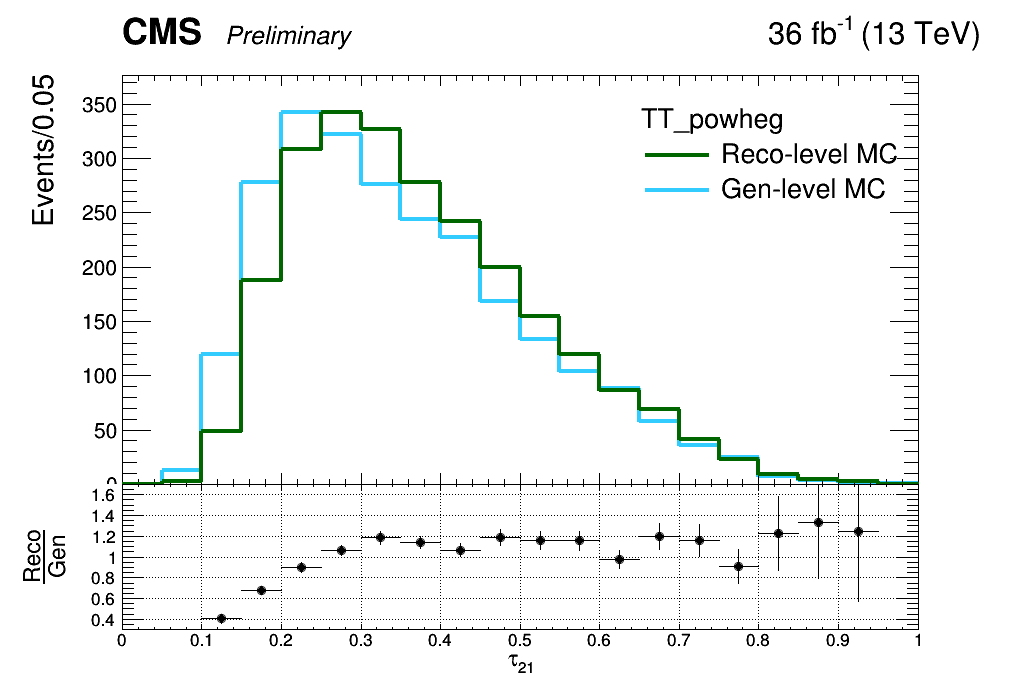

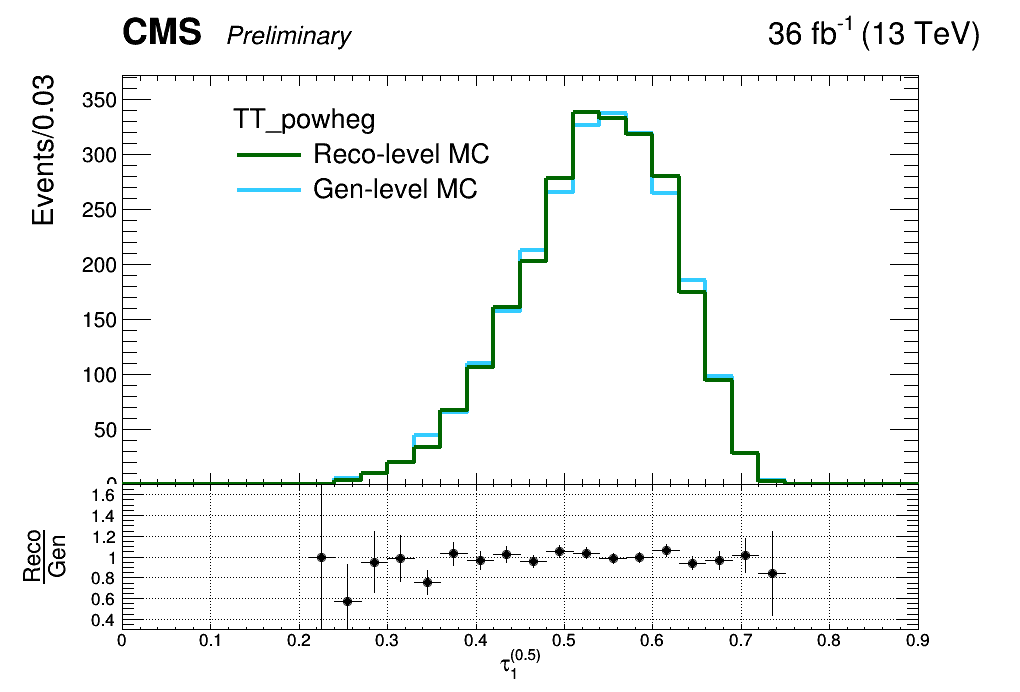

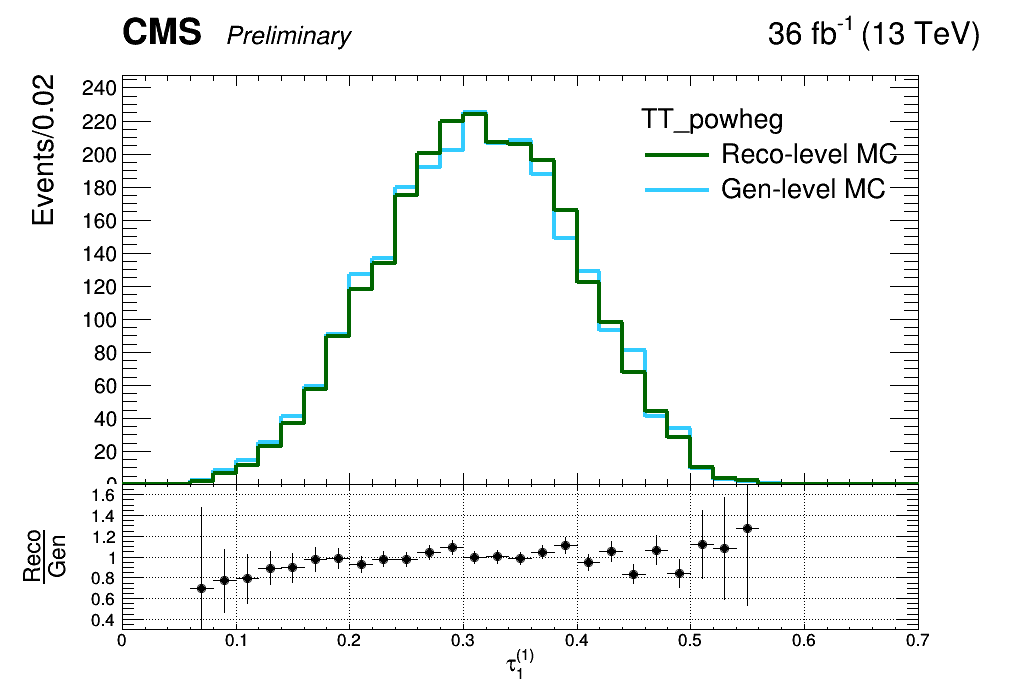

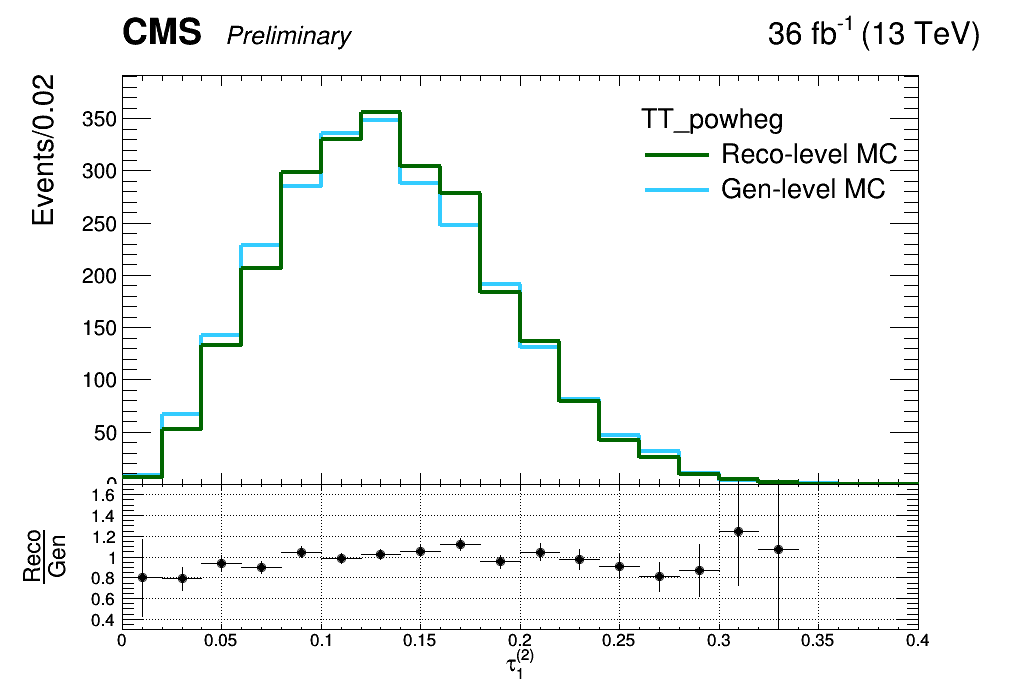

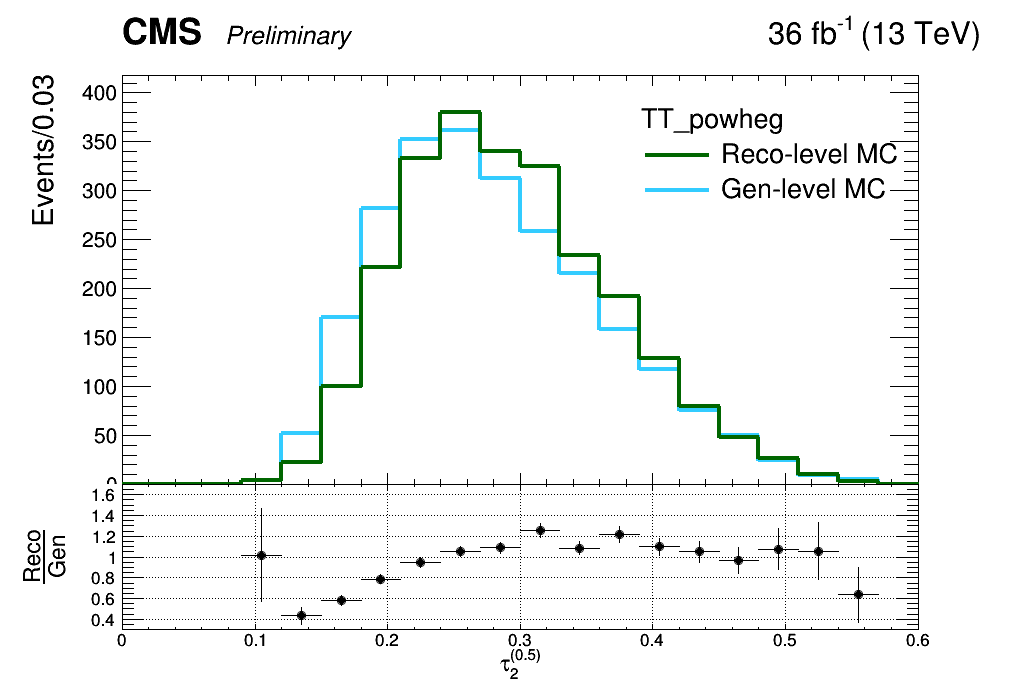

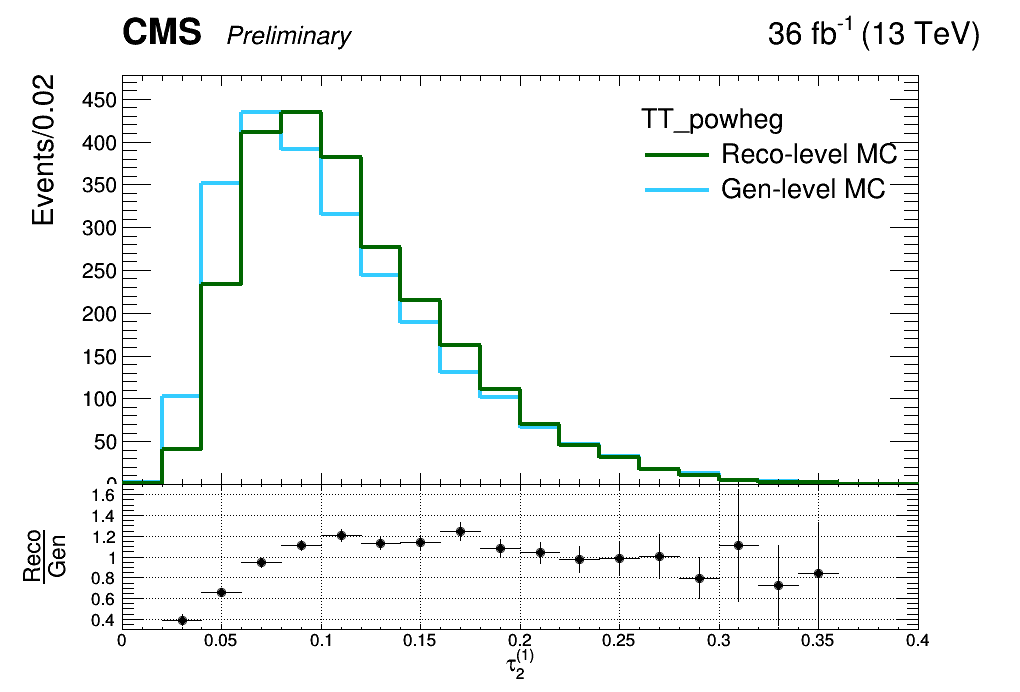

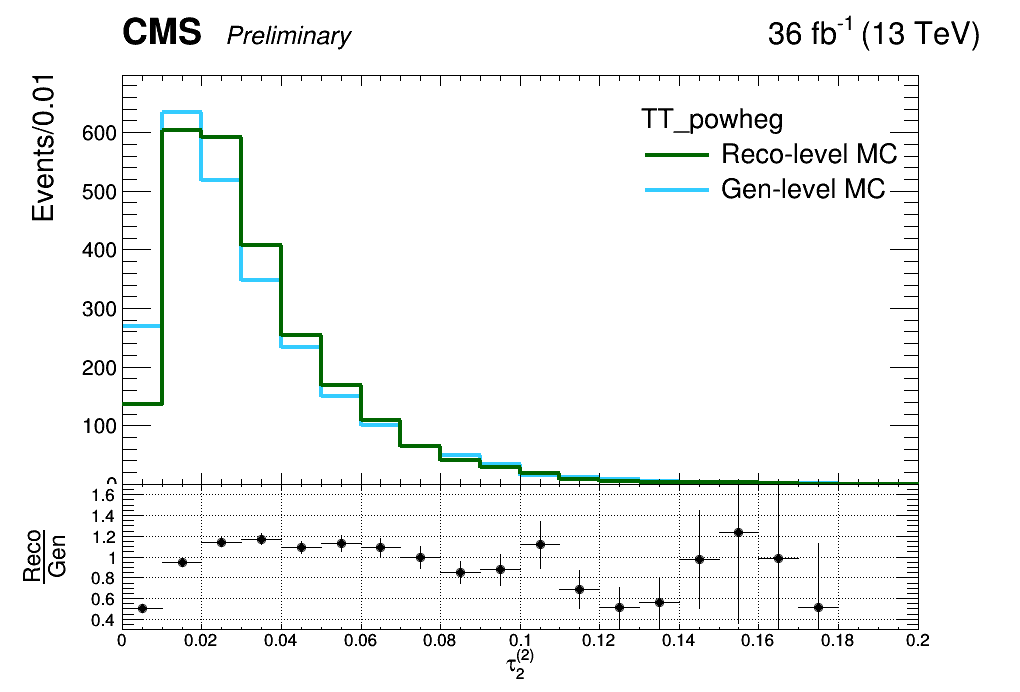

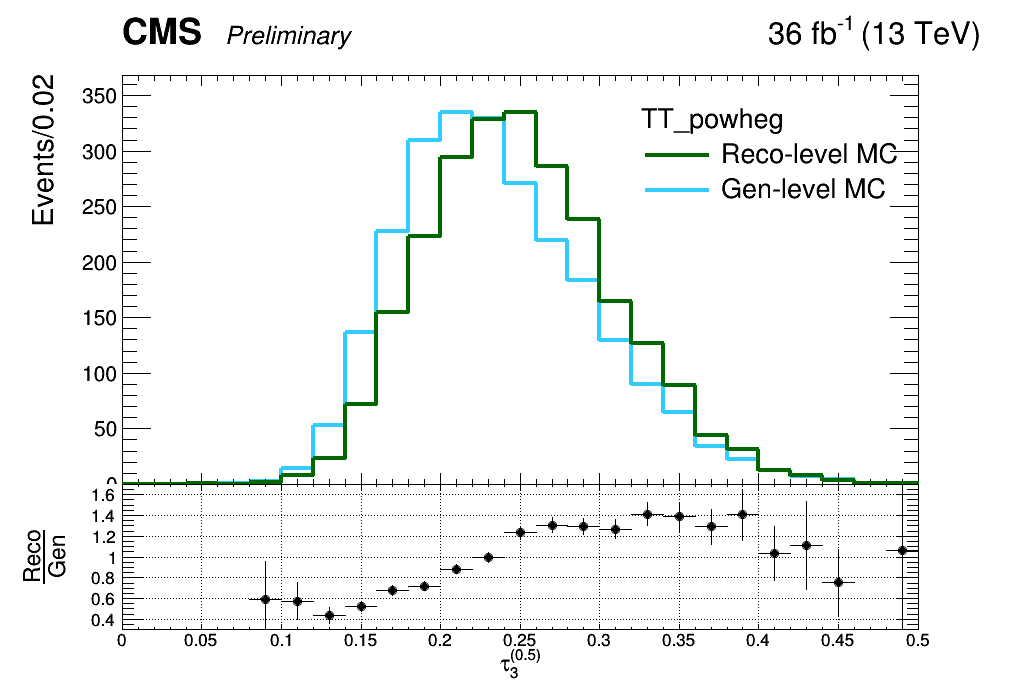

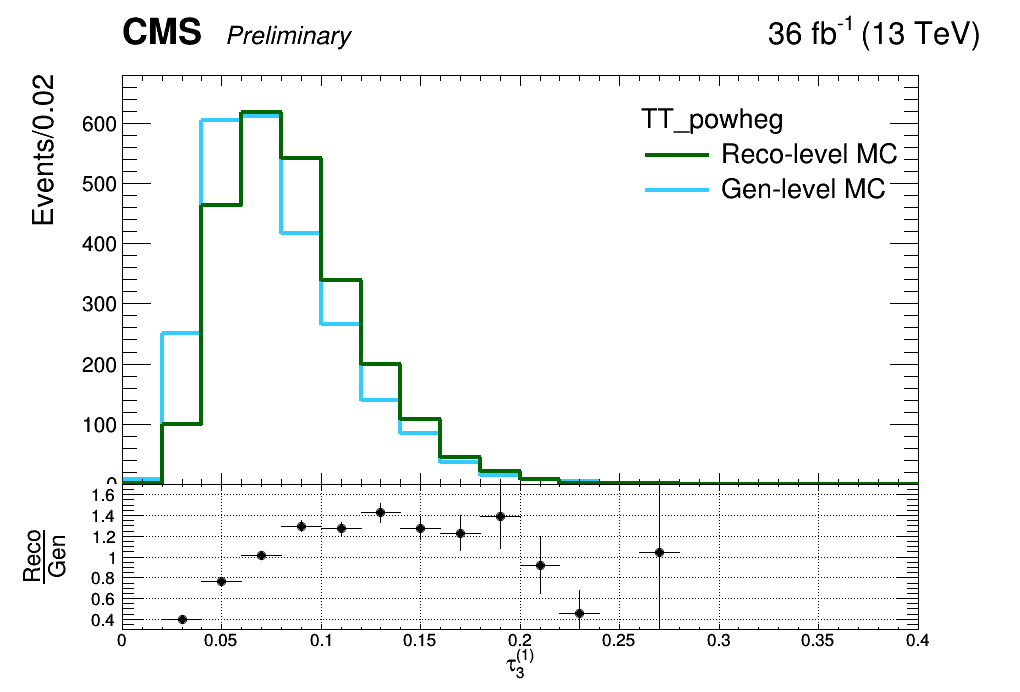

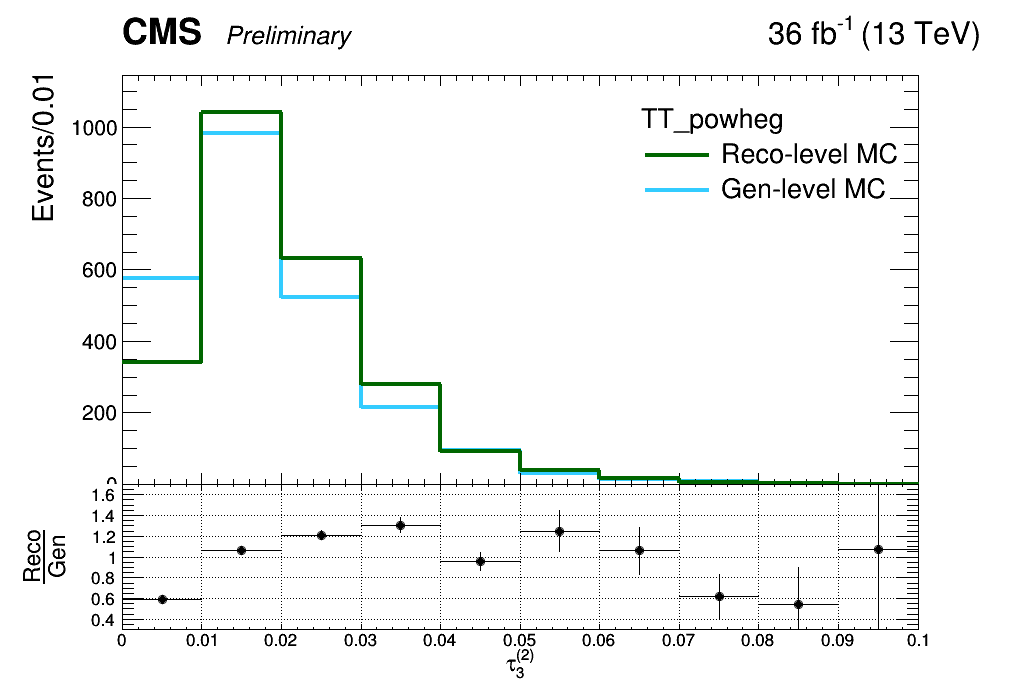

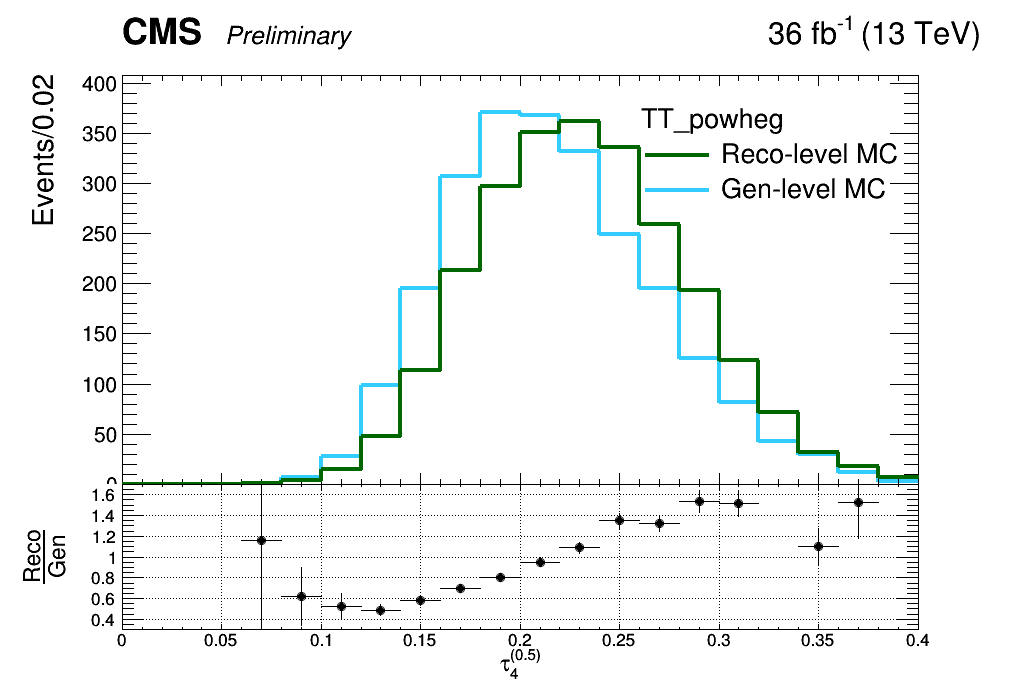

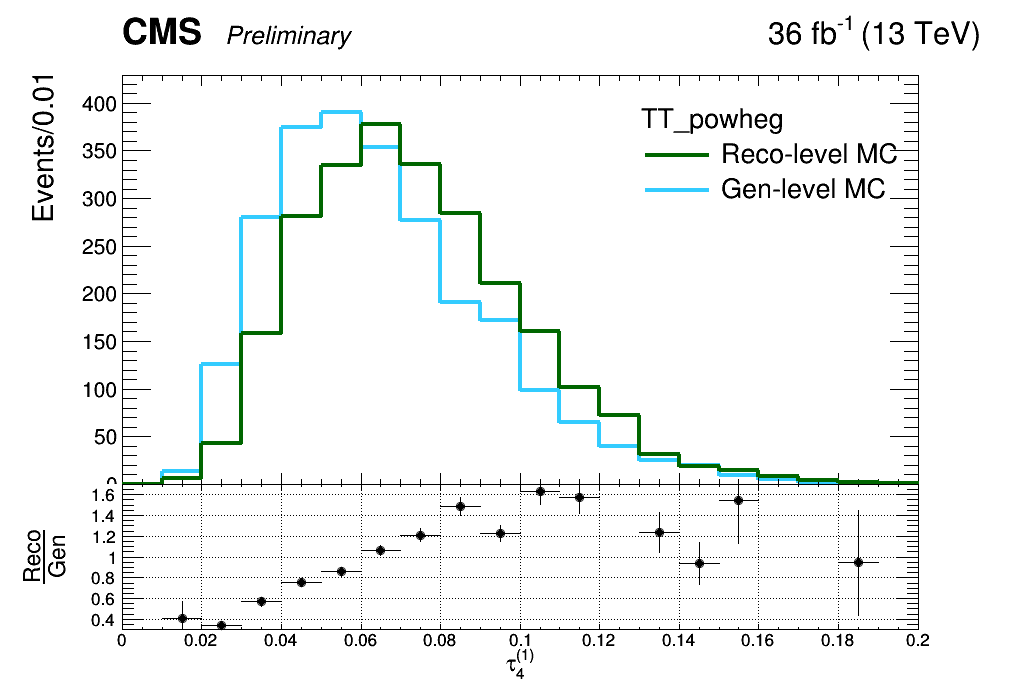

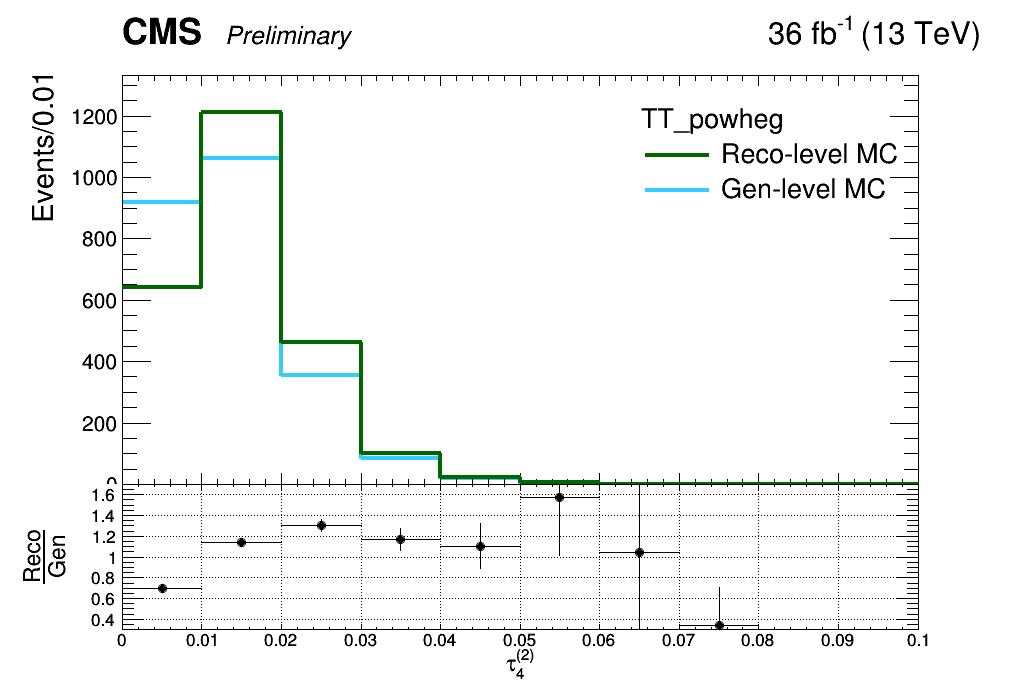

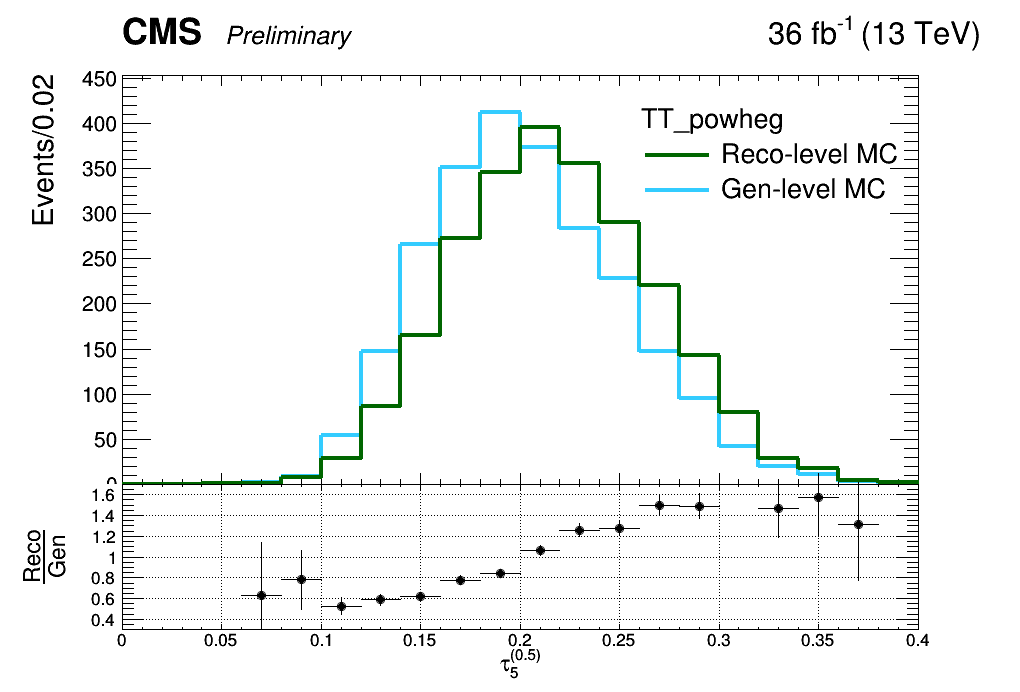

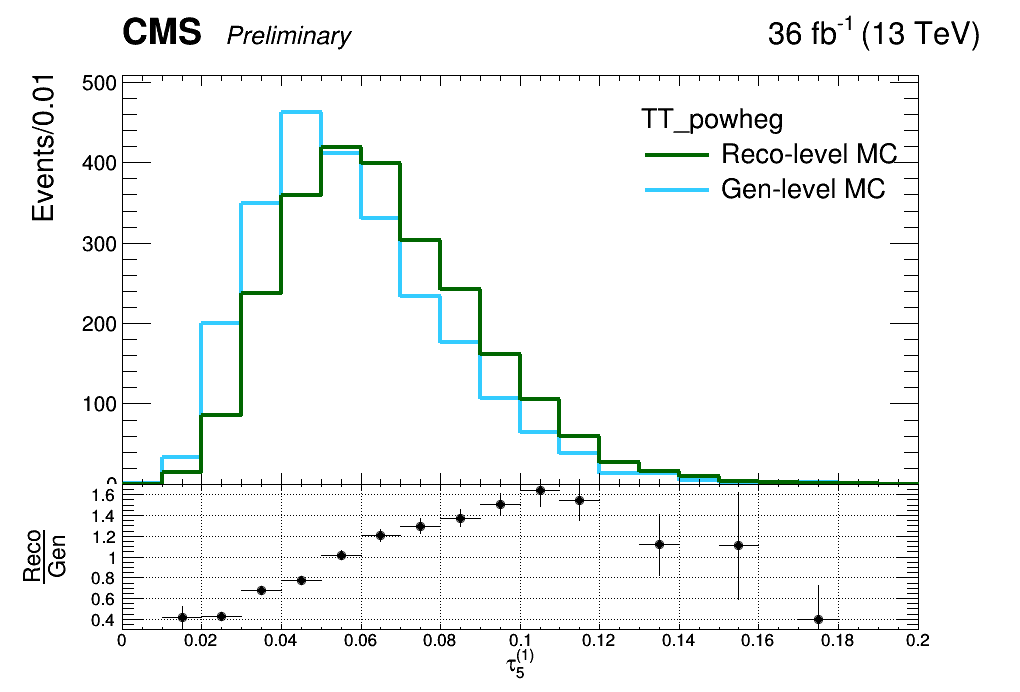

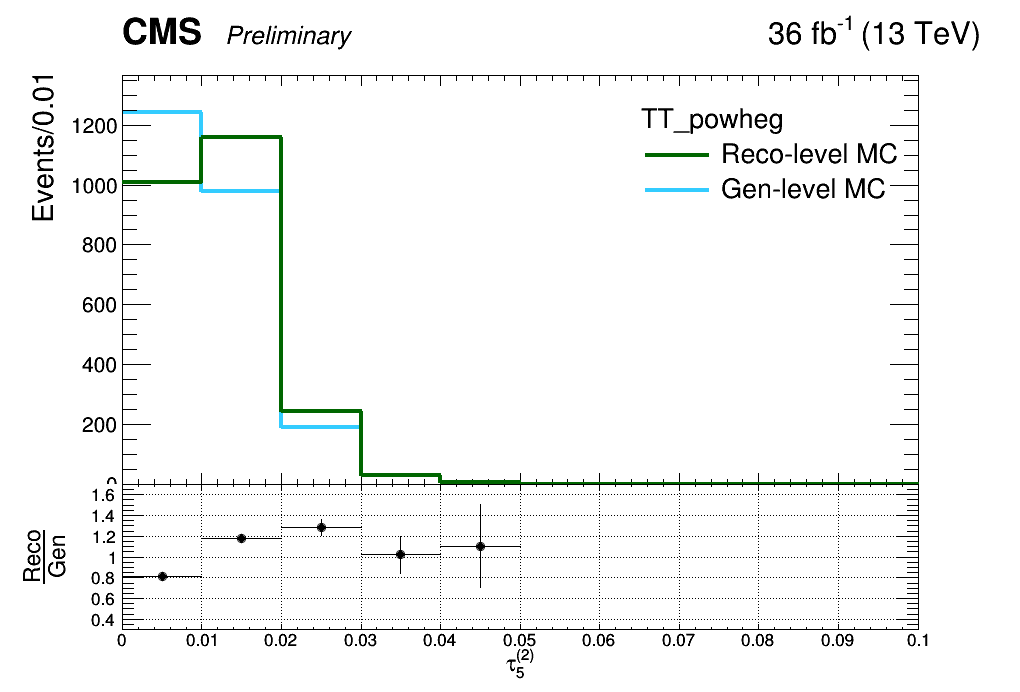

In [10]:
print MC_Compo[1],"W selection"

H_ref = 720; 
W_ref = 1024; 
W = W_ref
H  = H_ref

iPeriod = 4

# references for T, B, L, R
T = 0.08*H_ref
B = 0.12*H_ref 
L = 0.12*W_ref
R = 0.04*W_ref

x1_l = 0.97
y1_l = 0.85

dx_l = 0.35
dy_l = 0.15
x0_l = x1_l-dx_l
y0_l = y1_l-dy_l

canvas=np.zeros((l,),rt.TCanvas)
legend=np.zeros((l,),rt.TLegend)

CName=[]
for i in range(1,l+1):
    CName.append('c'+str(i))
Pad1=[]
Pad2=[]
Mc=[]
Ratio=[]
    
for i in range(l):
    canvas[i] = rt.TCanvas(CName[i],CName[i],0,0,W,H)
    canvas[i].SetFillColor(0)
    canvas[i].SetBorderMode(0)
    canvas[i].SetBorderSize(0)
    canvas[i].SetFrameFillStyle(0)
    canvas[i].SetFrameBorderMode(0)
    canvas[i].SetFrameLineWidth(0)
    canvas[i].SetLeftMargin( L/W )
    canvas[i].SetRightMargin( R/W )
    canvas[i].SetTopMargin( T/H )
    canvas[i].SetBottomMargin( B/H )
    canvas[i].SetTickx(0)
    canvas[i].SetTicky(0)
#canvas.Draw()

    pad1 = rt.TPad("pad1", "pad1", 0, 0.3, 1, 0.95, -1,0,0);
    pad1.SetBottomMargin(0.); #// Upper and lower plot are joined
#pad1.SetGridx();         #// Vertical grid
    pad1.SetBorderMode(0)
    pad1.SetBorderSize(0)
    pad1.SetFrameLineWidth(0)
    pad1.SetFrameBorderMode(0)
    pad1.Draw()           #// Draw the upper pad: pad1
    pad1.cd()
    Pad1.append(pad1)

    Reco_Pow_WSel[i].SetLineColor(rt.kGreen+3)
    Reco_Pow_WSel[i].SetLineWidth(4)
    Reco_Pow_WSel[i].SetLineStyle(1)
    Reco_Pow_WSel[i].SetFillColor(0)
    Reco_Pow_WSel[i].Sumw2()
    Gen_Pow_WSel[i].SetLineColor(rt.kAzure+8)
    Gen_Pow_WSel[i].SetLineWidth(4)
    Gen_Pow_WSel[i].SetLineStyle(1)
    Gen_Pow_WSel[i].SetFillColor(0)
    Gen_Pow_WSel[i].Sumw2()

    #Sepa_WSel[i].SetLineColor(rt.kAzure+8)
    #Sepa_WSel[i].SetFillColor(rt.kAzure+8)
    Gen_Pow_WSel[i].GetYaxis().SetTitle(Title_WSel[i][0])
    Gen_Pow_WSel[i].GetXaxis().SetTitle(Title_WSel[i][2])
    Gen_Pow_WSel[i].GetYaxis().SetTitleOffset(0.7)
    Gen_Pow_WSel[i].GetYaxis().SetTitleSize(0.07)
    Gen_Pow_WSel[i].GetYaxis().SetLabelSize(0.05)
    Gen_Pow_WSel[i].Draw("hist")
    Gen_Pow_WSel[i].SetMaximum(1.1*max([Gen_Pow_WSel[i].GetMaximum(),Reco_Pow_WSel[i].GetMaximum()]))
    Reco_Pow_WSel[i].Draw("histsame")

    CMS_lumi.CMS_lumi(canvas[i], iPeriod, iPos)
#    canvas[i].cd()
    
    canvas[i].cd()
    canvas[i].Update()
    canvas[i].RedrawAxis()
    frame = canvas[i].GetFrame()
    frame.Draw()

    pad2 = rt.TPad("pad2","pad2",0,0.0,1,0.3, -1,0,0)
    pad2.SetTopMargin(0)
    pad2.SetGridx()
    pad2.SetGridy()
    pad2.Draw()
    pad2.cd()
    pad2.SetBottomMargin(0.3)
    Pad2.append(pad2)

    ratio = rt.TH1D(Title_WSel[i][1],";;",*Range_WSel[i])
    ratio.GetXaxis().SetTitle(Title_WSel[i][2])
    ratio.Add(Reco_Pow_WSel[i])
    ratio.GetYaxis().CenterTitle(rt.kTRUE)
    ratio.GetXaxis().CenterTitle(rt.kTRUE)
    ratio.GetYaxis().SetRangeUser(0.3,1.7)
    ratio.GetYaxis().SetTitle("#frac{Reco}{Gen}")
    ratio.Sumw2()
    ratio.SetStats(0)
    ratio.Divide(Gen_Pow_WSel[i])
    ratio.GetYaxis().SetLabelSize(0.09)
    ratio.GetXaxis().SetLabelSize(0.09)
    ratio.SetMarkerColor(rt.kBlack)
    ratio.SetMarkerStyle(20)
    ratio.SetLineColor(rt.kBlack)
    ratio.GetYaxis().SetTitleSize(0.12)
    ratio.GetYaxis().SetTitleOffset(0.4)
    ratio.GetXaxis().SetTitleSize(0.12)
    ratio.GetXaxis().SetTitleOffset(0.85)
    Ratio.append(ratio)

    ratio.Draw("EP")
    canvas[i].cd()

    if i is 1:
        legend[i] =  rt.TLegend(x0_l-0.4,y0_l,x1_l-0.4,y1_l,"TT_powheg")
    else:
        legend[i] =  rt.TLegend(x0_l,y0_l,x1_l,y1_l,"TT_powheg")
    legend[i].AddEntry(Reco_Pow_WSel[i],"Reco-level MC","l")
    legend[i].AddEntry(Gen_Pow_WSel[i],"Gen-level MC","l")
    legend[i].SetTextFont(42)
    legend[i].SetTextAngle(0)
    legend[i].SetTextColor(rt.kBlack)    
    #legend.SetTextSize(0.05)    
    legend[i].SetTextAlign(12) 
    legend[i].SetBorderSize(0)
    legend[i].SetFillStyle(0)
    #legend.SetLinewdith(0)
    legend[i].Draw()


    canvas[i].Update()
    canvas[i].Draw()
    canvas[i].Print("/t3home/gelliu/Unfolding_Substructure/Figures/GenRecoComparison_OldSamples/TT_powheg_WSel/"+Objects_WSel[i]+".png")

# TT_powheg top Selection

TT_powheg top selection


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Info in <TCanvas::Print>: png file /t3home/gelliu/Unfolding_Substructure/Figures/GenRecoComparison_OldSamples/TT_powheg_topSel/respJetTau21_nom_topSel.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2
Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Info in <TCanvas::Print>: png file /t3home/gelliu/Unfolding_Substructure/Figures/GenRecoComparison_OldSamples/TT_powheg_topSel/respJet_tau_0p5_0_nom_topSel.png has been created
Warning in <TCanvas::Constructor>: Deleting

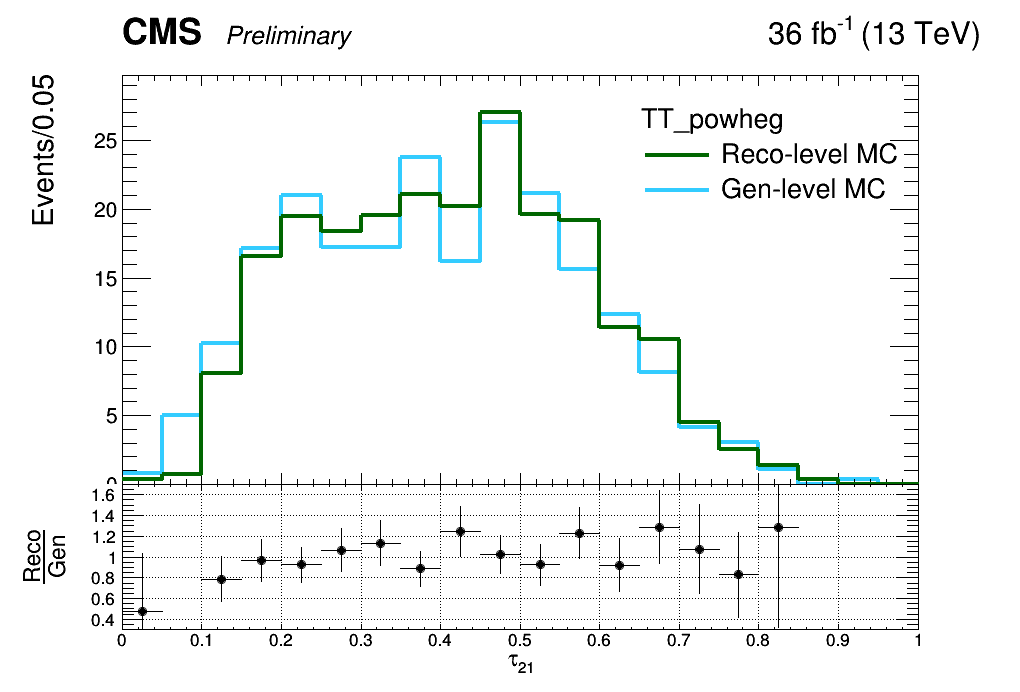

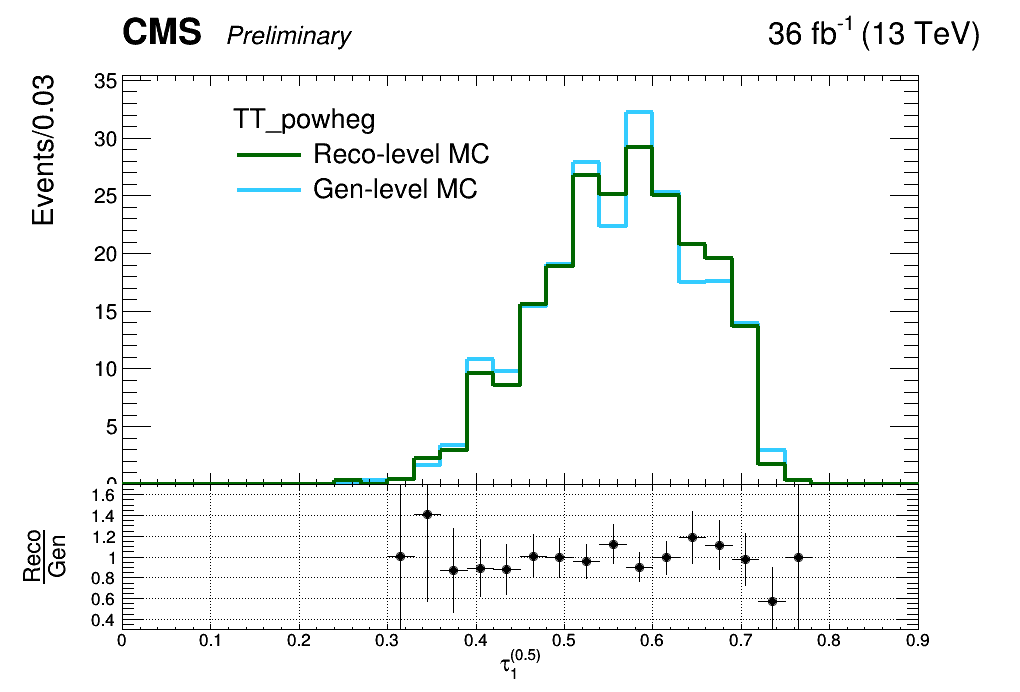

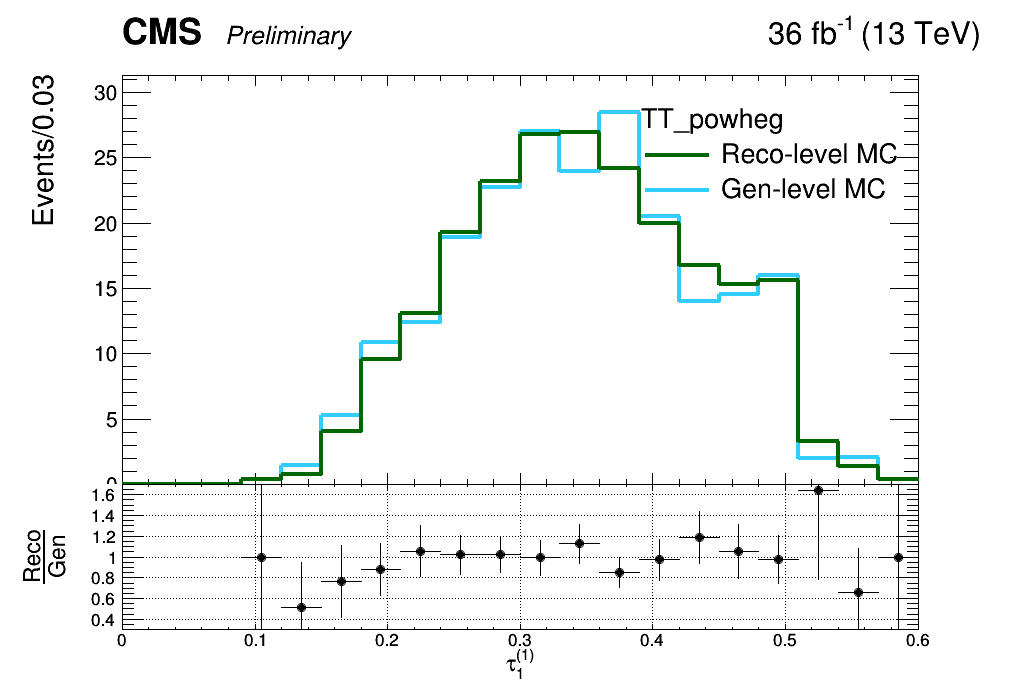

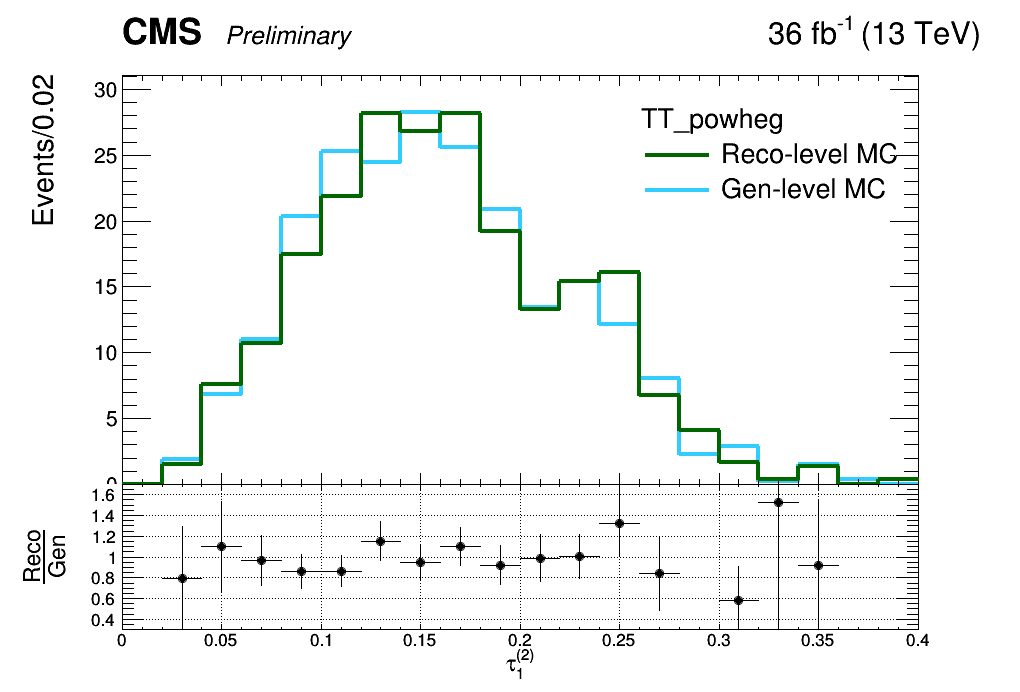

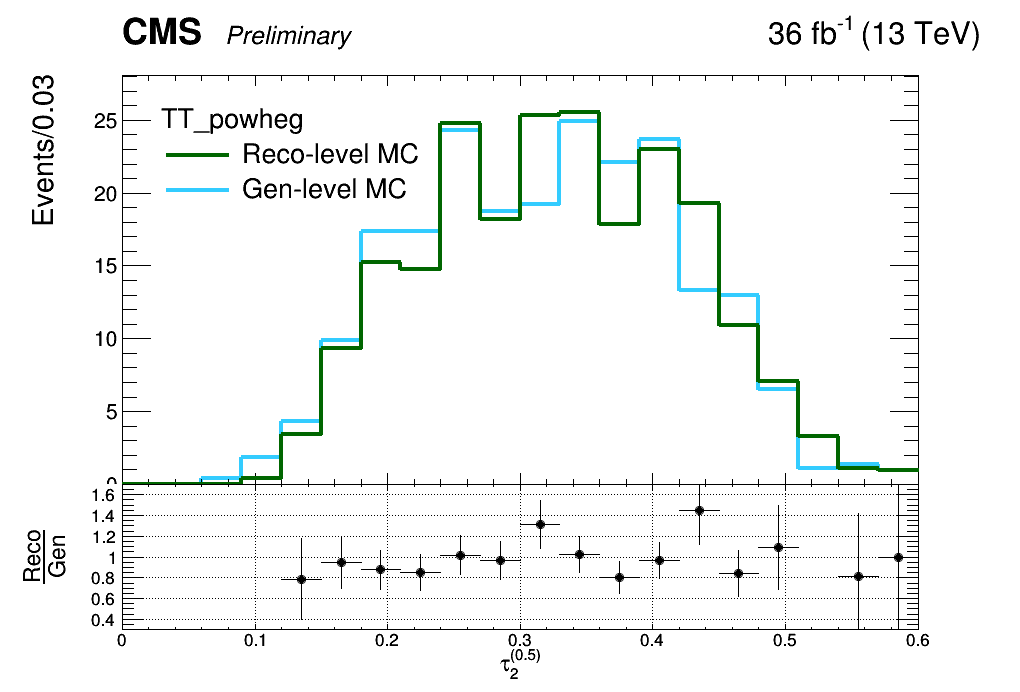

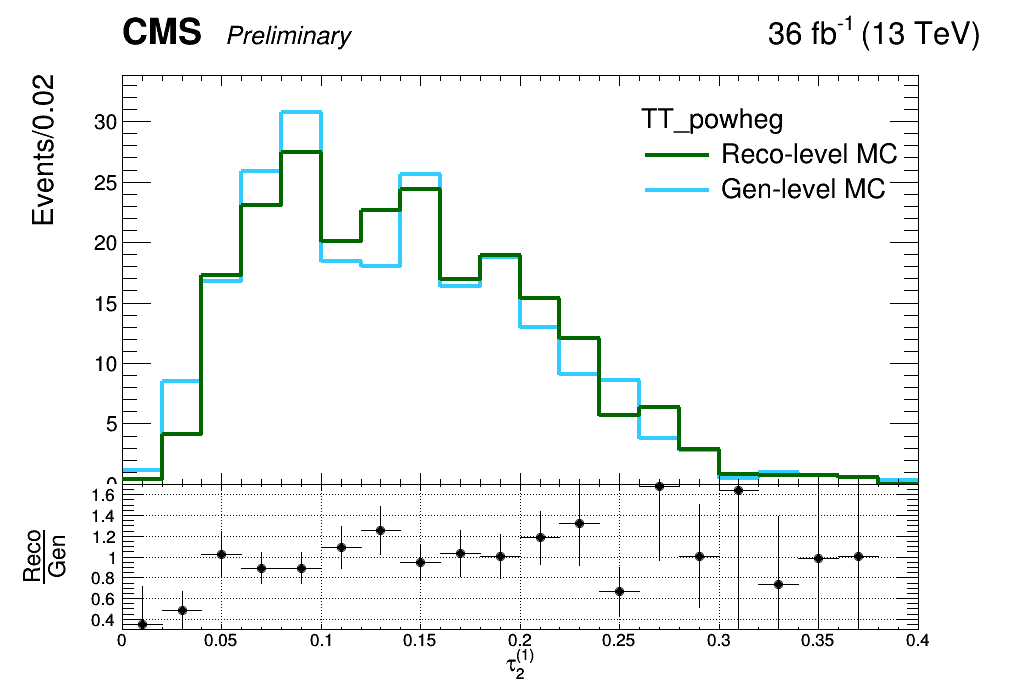

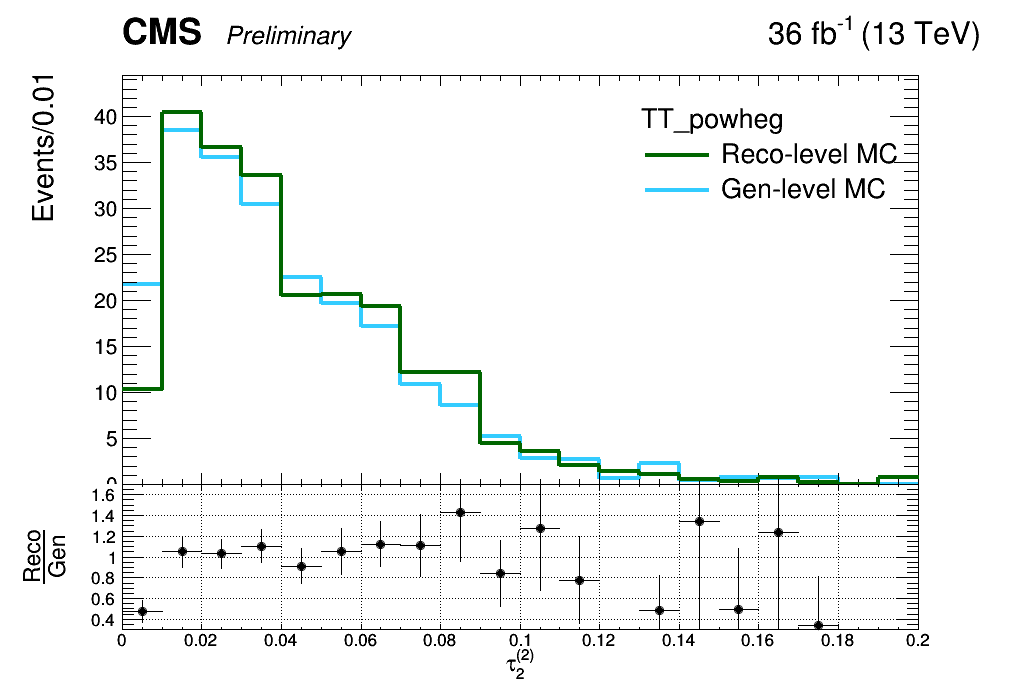

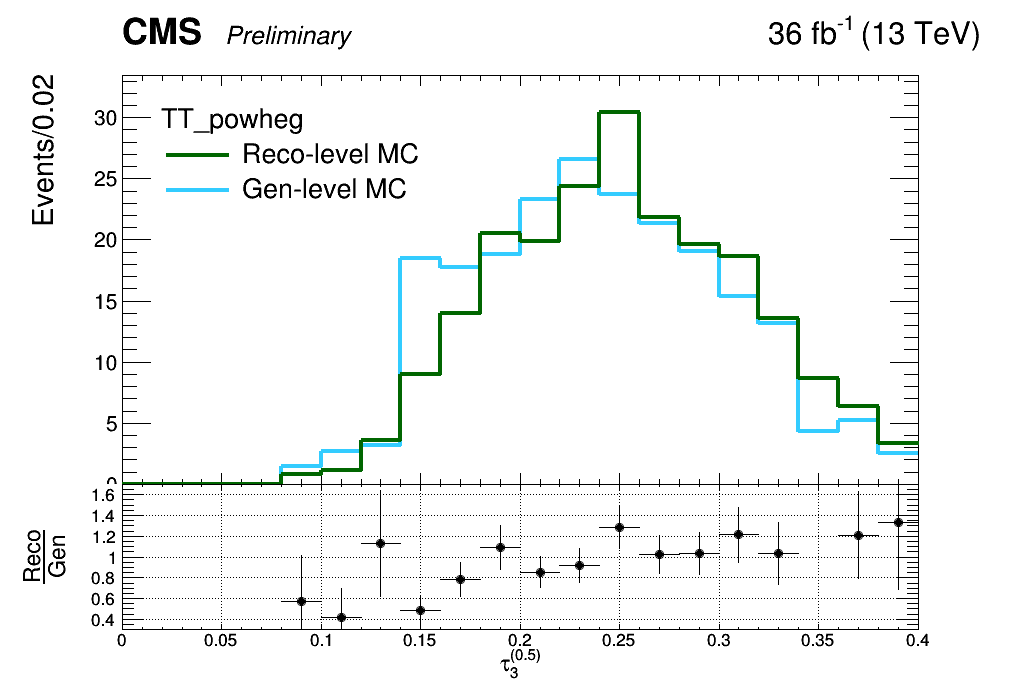

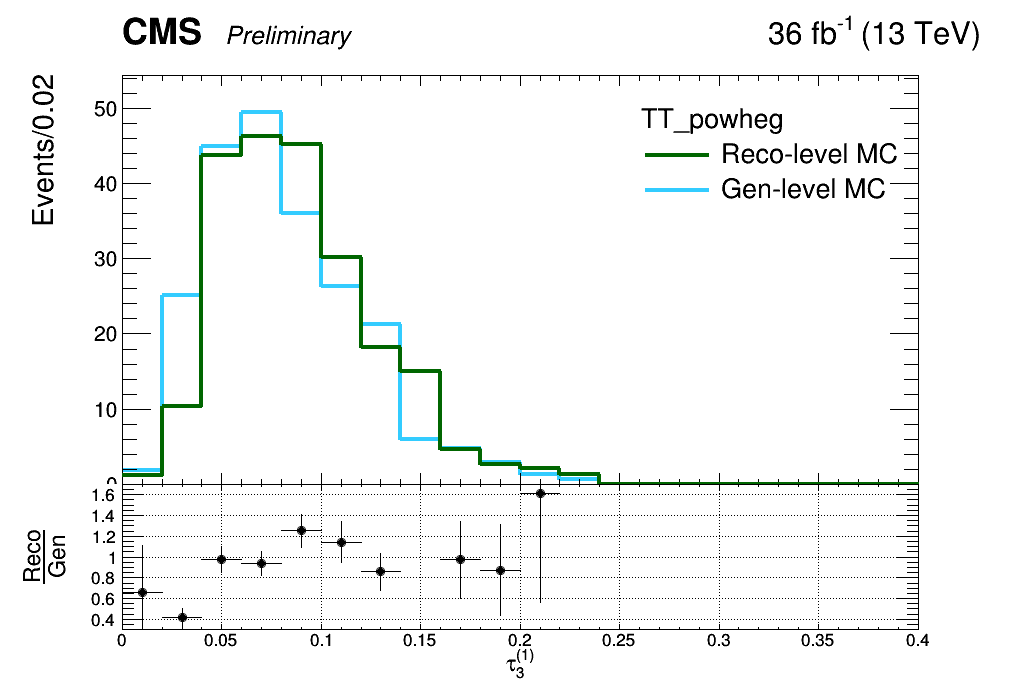

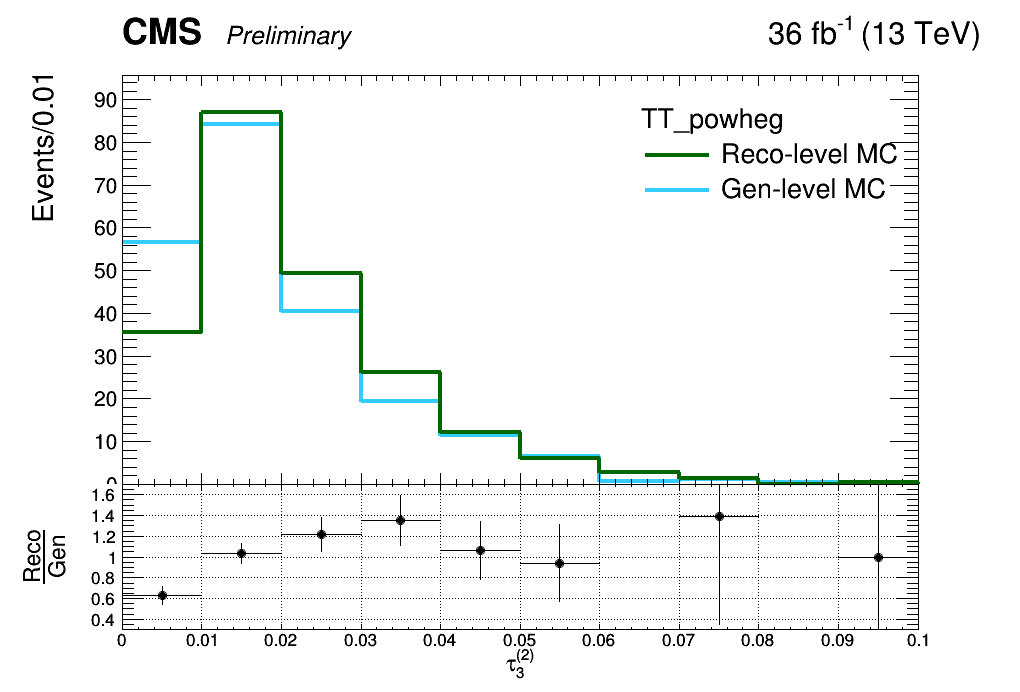

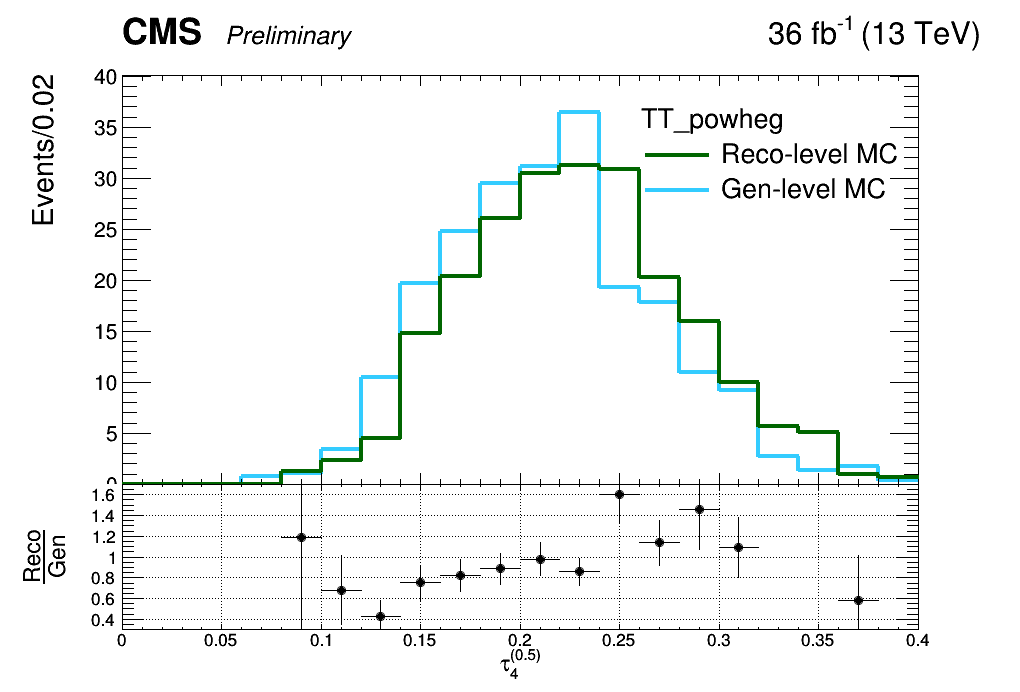

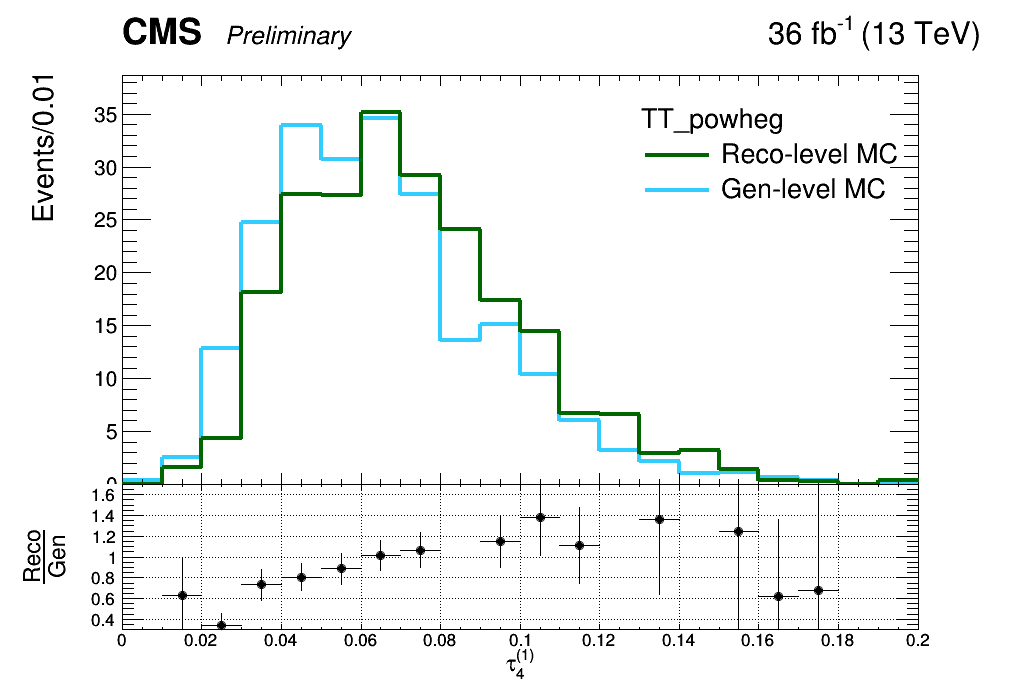

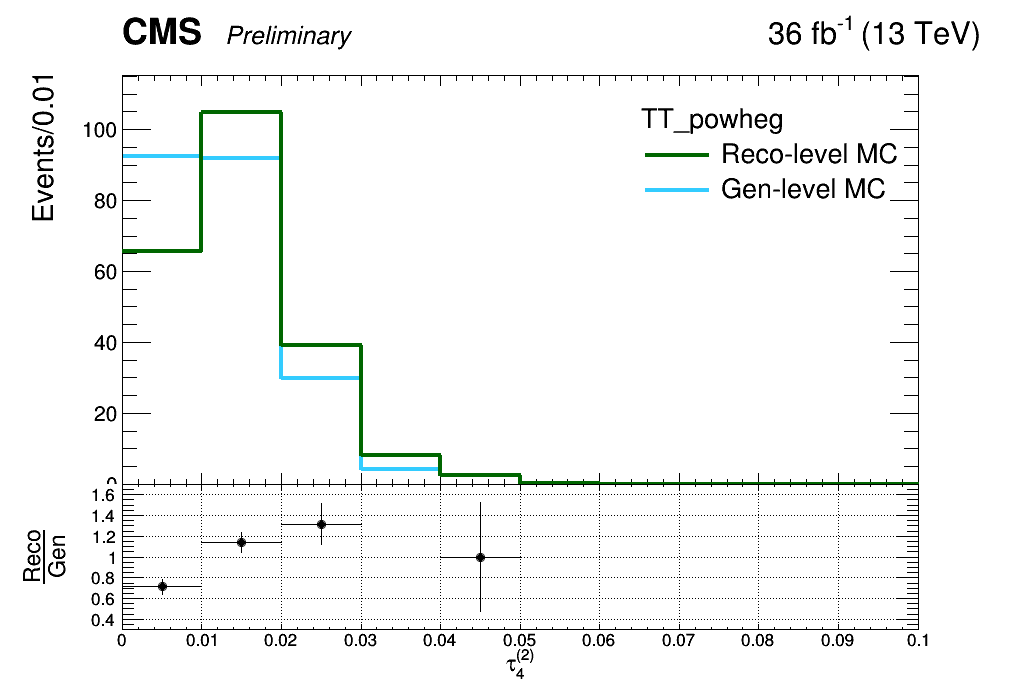

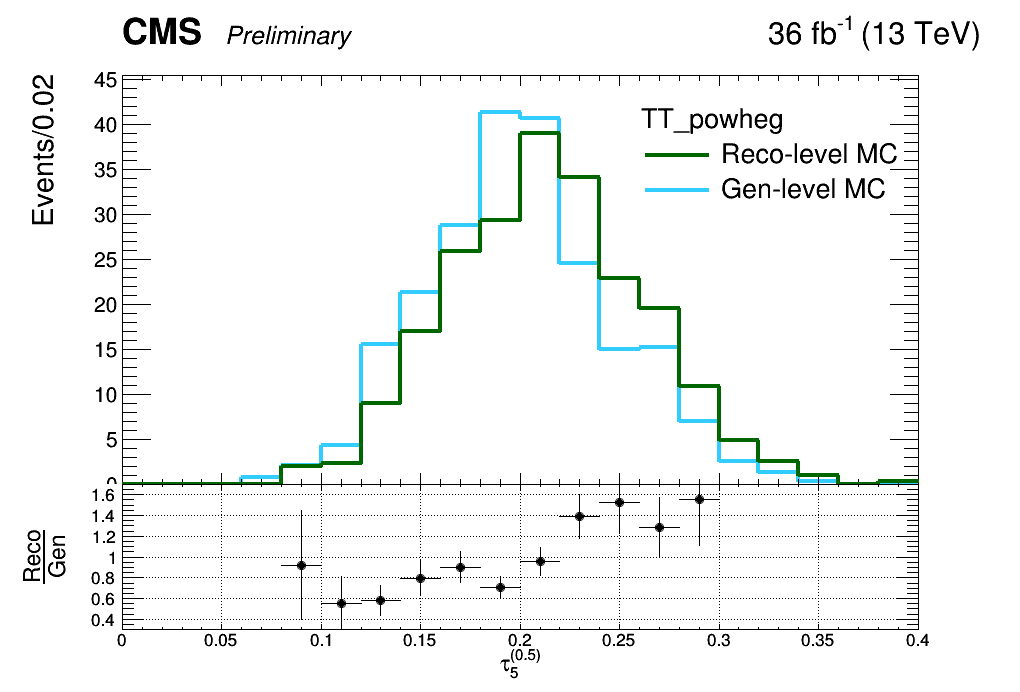

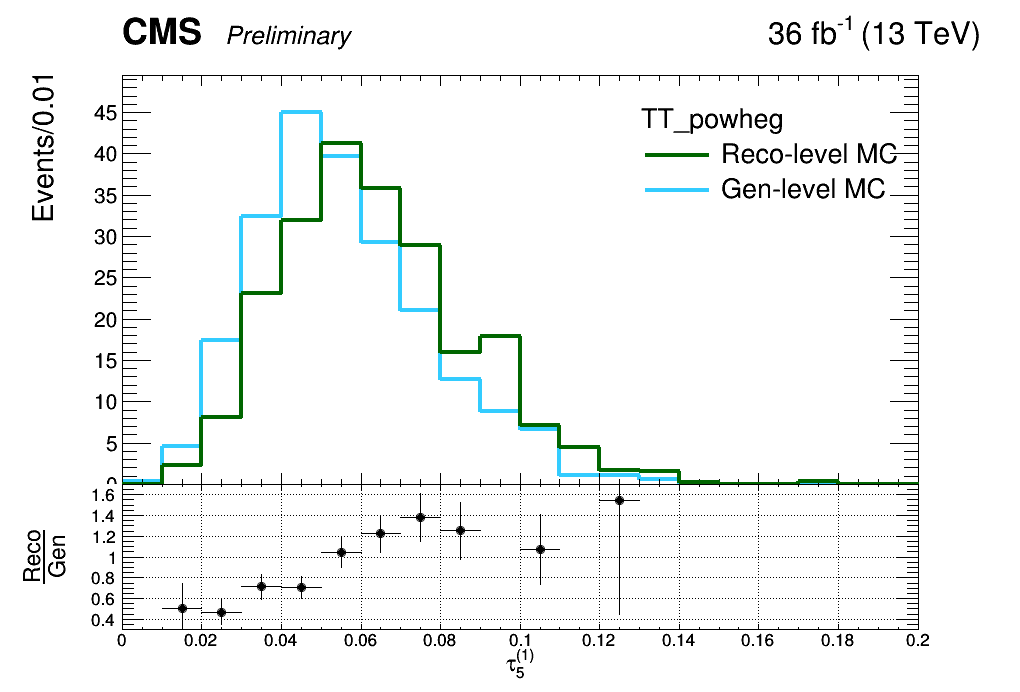

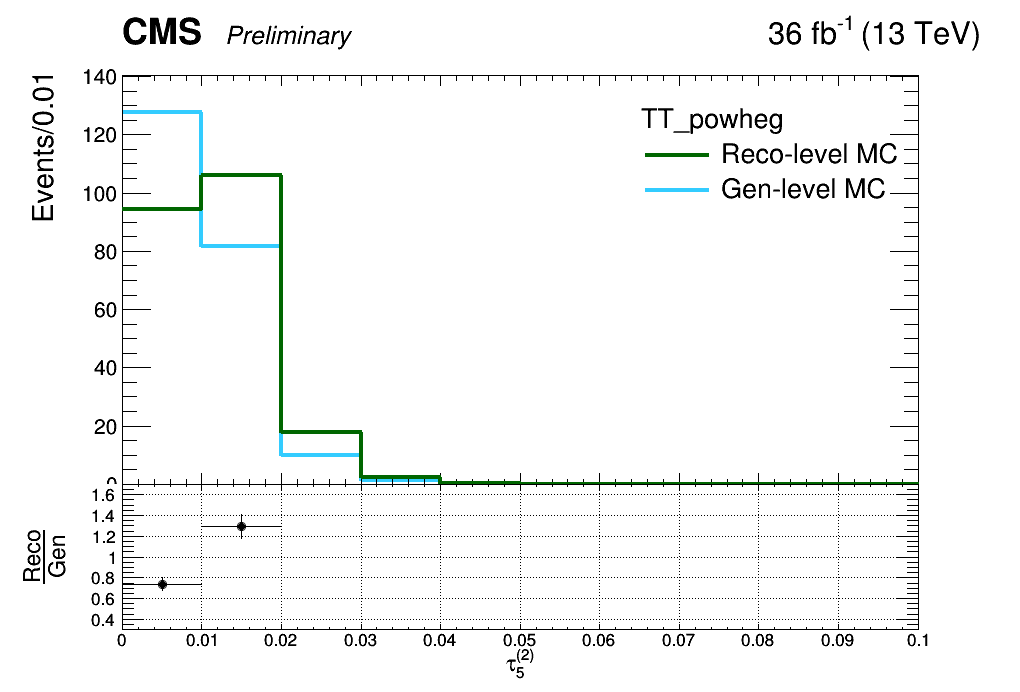

In [11]:
print MC_Compo[1],"top selection"

H_ref = 720; 
W_ref = 1024; 
W = W_ref
H  = H_ref

iPeriod = 4

# references for T, B, L, R
T = 0.08*H_ref
B = 0.12*H_ref 
L = 0.12*W_ref
R = 0.04*W_ref

x1_l = 0.97
y1_l = 0.85

dx_l = 0.35
dy_l = 0.15
x0_l = x1_l-dx_l
y0_l = y1_l-dy_l

canvas=np.zeros((l,),rt.TCanvas)
legend=np.zeros((l,),rt.TLegend)

CName=[]
for i in range(1,l+1):
    CName.append('c'+str(i))
Pad1=[]
Pad2=[]
Mc=[]
Ratio=[]
    
for i in range(l):
    canvas[i] = rt.TCanvas(CName[i],CName[i],0,0,W,H)
    canvas[i].SetFillColor(0)
    canvas[i].SetBorderMode(0)
    canvas[i].SetBorderSize(0)
    canvas[i].SetFrameFillStyle(0)
    canvas[i].SetFrameBorderMode(0)
    canvas[i].SetFrameLineWidth(0)
    canvas[i].SetLeftMargin( L/W )
    canvas[i].SetRightMargin( R/W )
    canvas[i].SetTopMargin( T/H )
    canvas[i].SetBottomMargin( B/H )
    canvas[i].SetTickx(0)
    canvas[i].SetTicky(0)
#canvas.Draw()

    pad1 = rt.TPad("pad1", "pad1", 0, 0.3, 1, 0.95, -1,0,0);
    pad1.SetBottomMargin(0.); #// Upper and lower plot are joined
#pad1.SetGridx();         #// Vertical grid
    pad1.SetBorderMode(0)
    pad1.SetBorderSize(0)
    pad1.SetFrameLineWidth(0)
    pad1.SetFrameBorderMode(0)
    pad1.Draw()           #// Draw the upper pad: pad1
    pad1.cd()
    Pad1.append(pad1)

    Reco_Pow_topSel[i].SetLineColor(rt.kGreen+3)
    Reco_Pow_topSel[i].SetLineWidth(4)
    Reco_Pow_topSel[i].SetLineStyle(1)
    Reco_Pow_topSel[i].SetFillColor(0)
    Reco_Pow_topSel[i].Sumw2()
    Gen_Pow_topSel[i].SetLineColor(rt.kAzure+8)
    Gen_Pow_topSel[i].SetLineWidth(4)
    Gen_Pow_topSel[i].SetLineStyle(1)
    Gen_Pow_topSel[i].SetFillColor(0)
    Gen_Pow_topSel[i].Sumw2()

    #Sepa_topSel[i].SetLineColor(rt.kAzure+8)
    #Sepa_topSel[i].SetFillColor(rt.kAzure+8)
    Gen_Pow_topSel[i].GetYaxis().SetTitle(Title_topSel[i][0])
    Gen_Pow_topSel[i].GetXaxis().SetTitle(Title_topSel[i][2])
    Gen_Pow_topSel[i].GetYaxis().SetTitleOffset(0.7)
    Gen_Pow_topSel[i].GetYaxis().SetTitleSize(0.07)
    Gen_Pow_topSel[i].GetYaxis().SetLabelSize(0.05)
    Gen_Pow_topSel[i].Draw("hist")
    Gen_Pow_topSel[i].SetMaximum(1.1*max([Gen_Pow_topSel[i].GetMaximum(),Reco_Pow_topSel[i].GetMaximum()]))
    Reco_Pow_topSel[i].Draw("histsame")

    CMS_lumi.CMS_lumi(canvas[i], iPeriod, iPos)
#    canvas[i].cd()
    
    canvas[i].cd()
    canvas[i].Update()
    canvas[i].RedrawAxis()
    frame = canvas[i].GetFrame()
    frame.Draw()

    pad2 = rt.TPad("pad2","pad2",0,0.0,1,0.3, -1,0,0)
    pad2.SetTopMargin(0)
    pad2.SetGridx()
    pad2.SetGridy()
    pad2.Draw()
    pad2.cd()
    pad2.SetBottomMargin(0.3)
    Pad2.append(pad2)

    ratio = rt.TH1D(Title_topSel[i][1],";;",*Range_topSel[i])
    ratio.GetXaxis().SetTitle(Title_topSel[i][2])
    ratio.Add(Reco_Pow_topSel[i])
    ratio.GetYaxis().CenterTitle(rt.kTRUE)
    ratio.GetXaxis().CenterTitle(rt.kTRUE)
    ratio.GetYaxis().SetRangeUser(0.3,1.7)
    ratio.GetYaxis().SetTitle("#frac{Reco}{Gen}")
    ratio.Sumw2()
    ratio.SetStats(0)
    ratio.Divide(Gen_Pow_topSel[i])
    ratio.GetYaxis().SetLabelSize(0.09)
    ratio.GetXaxis().SetLabelSize(0.09)
    ratio.SetMarkerColor(rt.kBlack)
    ratio.SetMarkerStyle(20)
    ratio.SetLineColor(rt.kBlack)
    ratio.GetYaxis().SetTitleSize(0.12)
    ratio.GetYaxis().SetTitleOffset(0.4)
    ratio.GetXaxis().SetTitleSize(0.12)
    ratio.GetXaxis().SetTitleOffset(0.85)
    Ratio.append(ratio)

    ratio.Draw("EP")
    canvas[i].cd()

    if i is 1 :
        legend[i] =  rt.TLegend(x0_l-0.4,y0_l,x1_l-0.4,y1_l,"TT_powheg")
    elif i is 4 or i is 7:
        legend[i] =  rt.TLegend(x0_l-0.47,y0_l,x1_l-0.47,y1_l,"TT_powheg")
    else:
        legend[i] =  rt.TLegend(x0_l,y0_l,x1_l,y1_l,"TT_powheg")
    legend[i].AddEntry(Reco_Pow_topSel[i],"Reco-level MC","l")
    legend[i].AddEntry(Gen_Pow_topSel[i],"Gen-level MC","l")
    legend[i].SetTextFont(42)
    legend[i].SetTextAngle(0)
    legend[i].SetTextColor(rt.kBlack)    
    #legend.SetTextSize(0.05)    
    legend[i].SetTextAlign(12) 
    legend[i].SetBorderSize(0)
    legend[i].SetFillStyle(0)
    #legend.SetLinewdith(0)
    legend[i].Draw()


    canvas[i].Update()
    canvas[i].Draw()
    canvas[i].Print("/t3home/gelliu/Unfolding_Substructure/Figures/GenRecoComparison_OldSamples/TT_powheg_topSel/"+Objects_topSel[i]+".png")

# TT_madgraph W Selection

TTJets_madgraph W selection


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Info in <TCanvas::Print>: png file /t3home/gelliu/Unfolding_Substructure/Figures/GenRecoComparison_OldSamples/TT_madgraph_WSel/respJetTau21_nom_WSel.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2
Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Info in <TCanvas::Print>: png file /t3home/gelliu/Unfolding_Substructure/Figures/GenRecoComparison_OldSamples/TT_madgraph_WSel/respJet_tau_0p5_0_nom_WSel.png has been created
Warning in <TCanvas::Constructor>: Deleting can

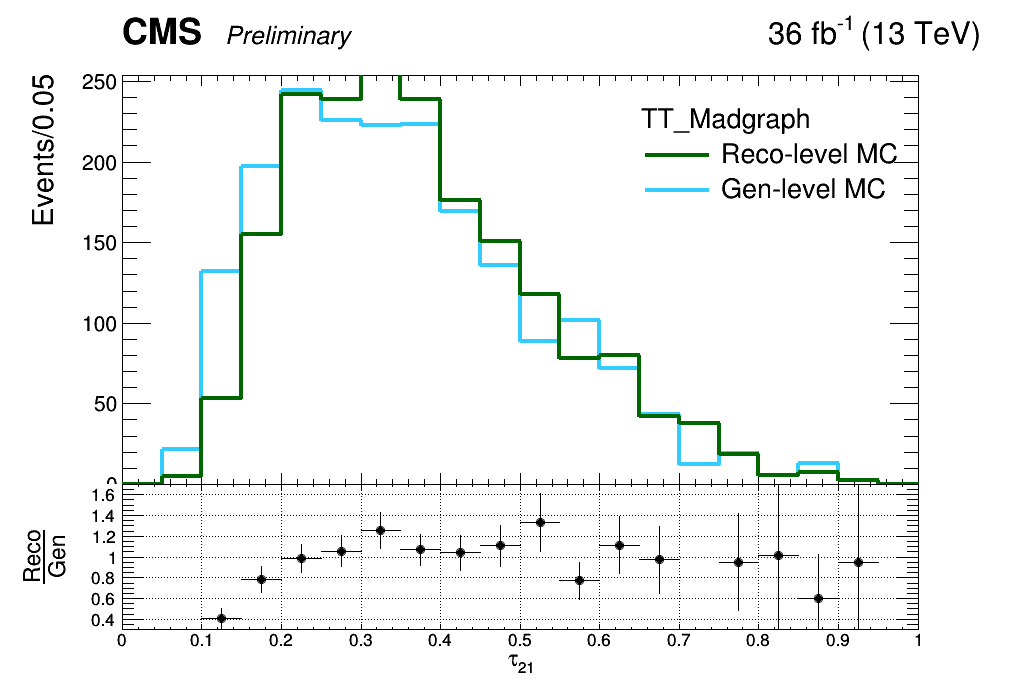

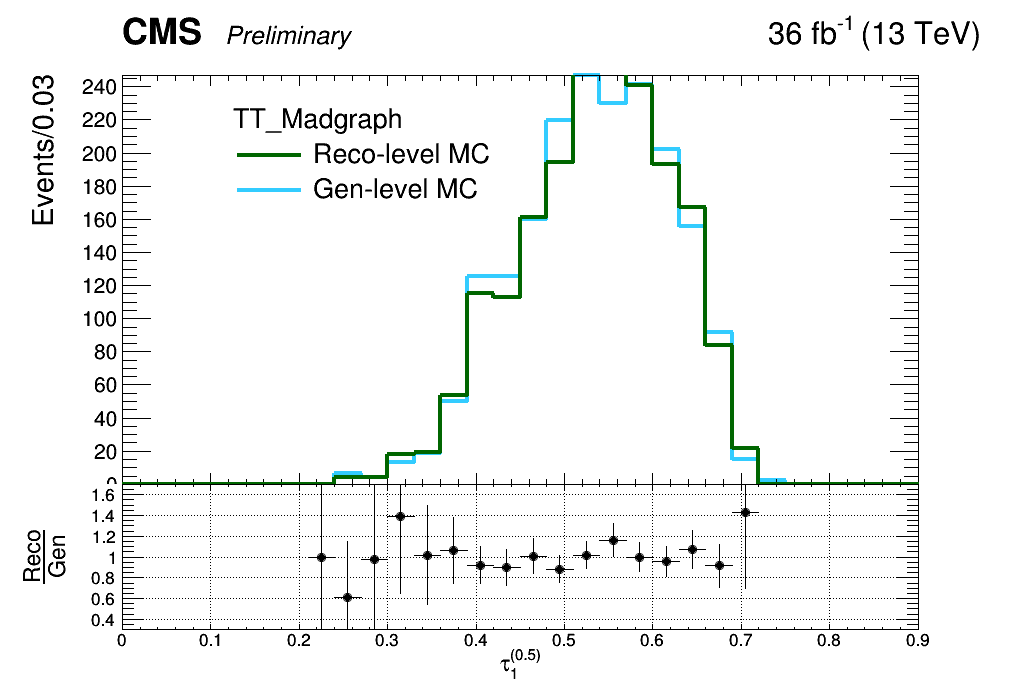

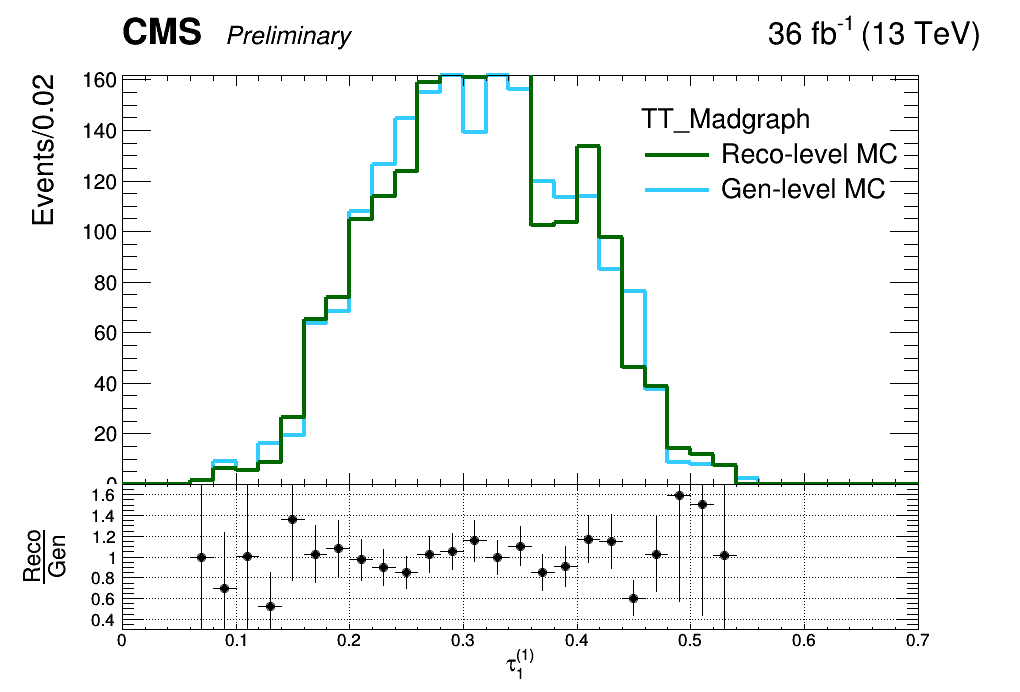

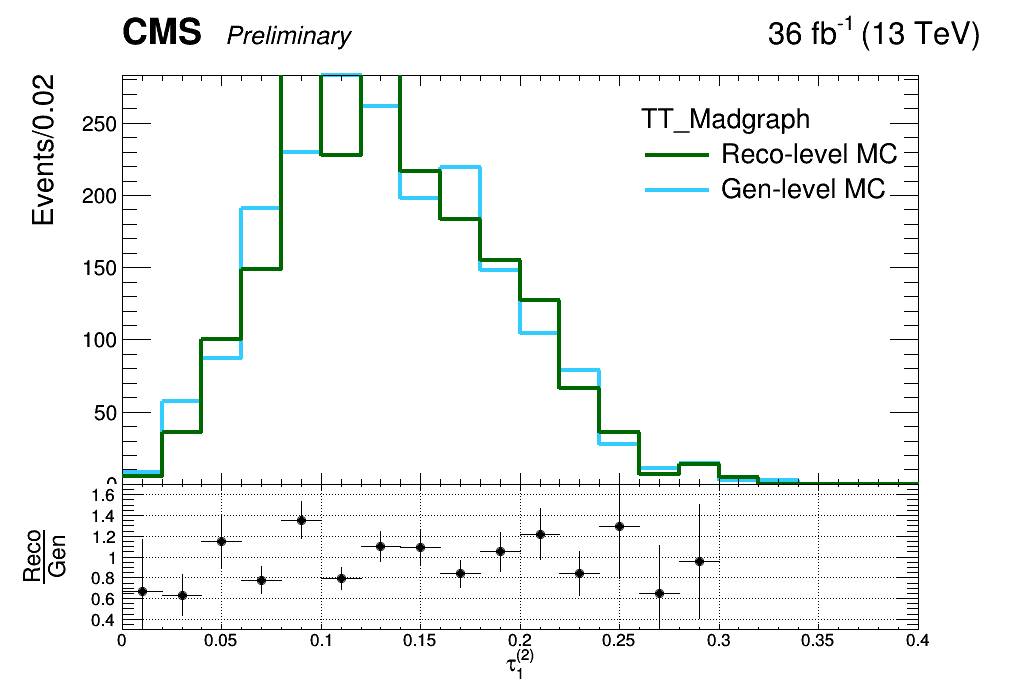

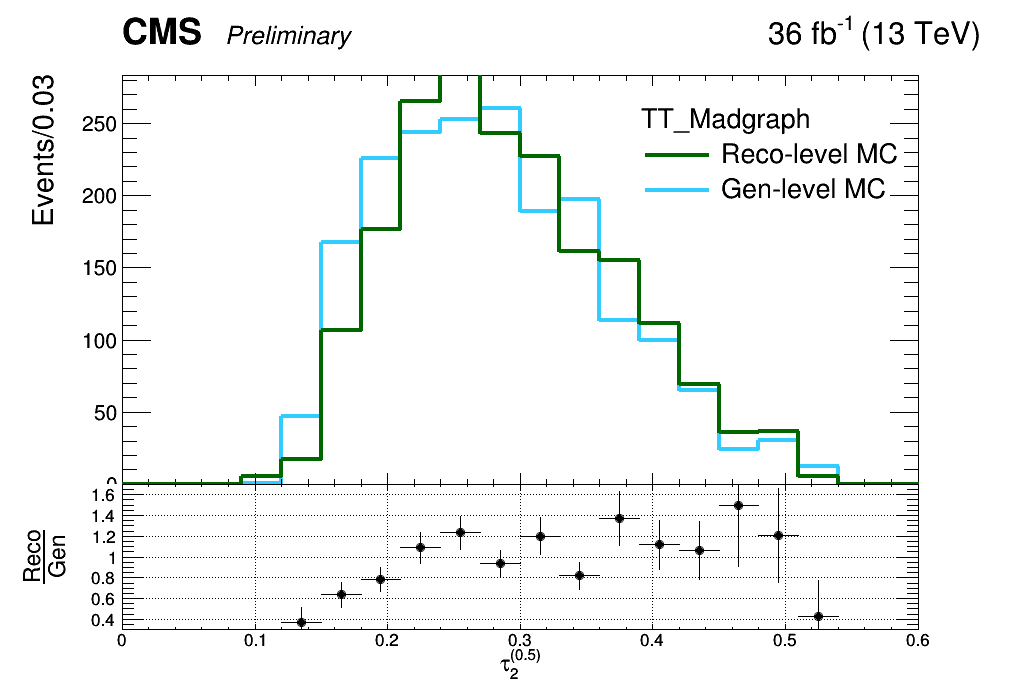

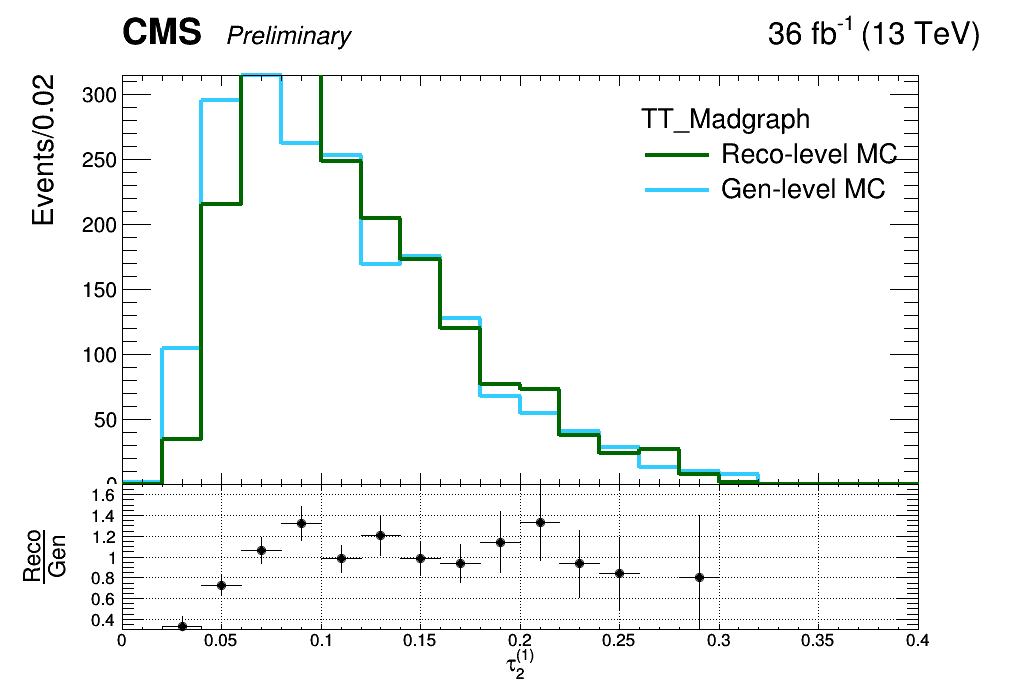

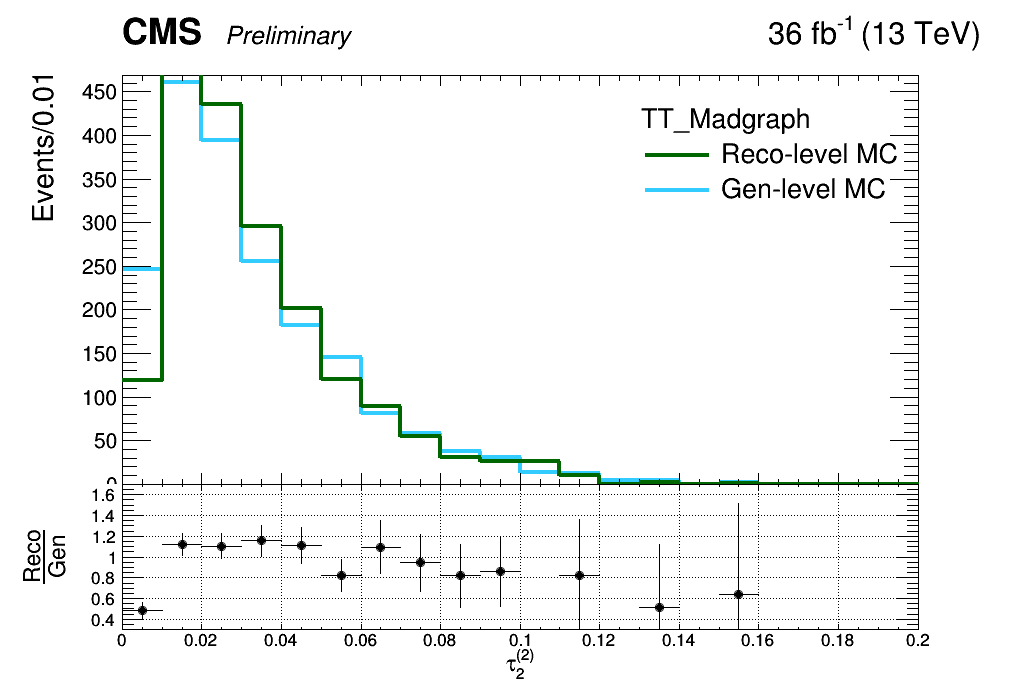

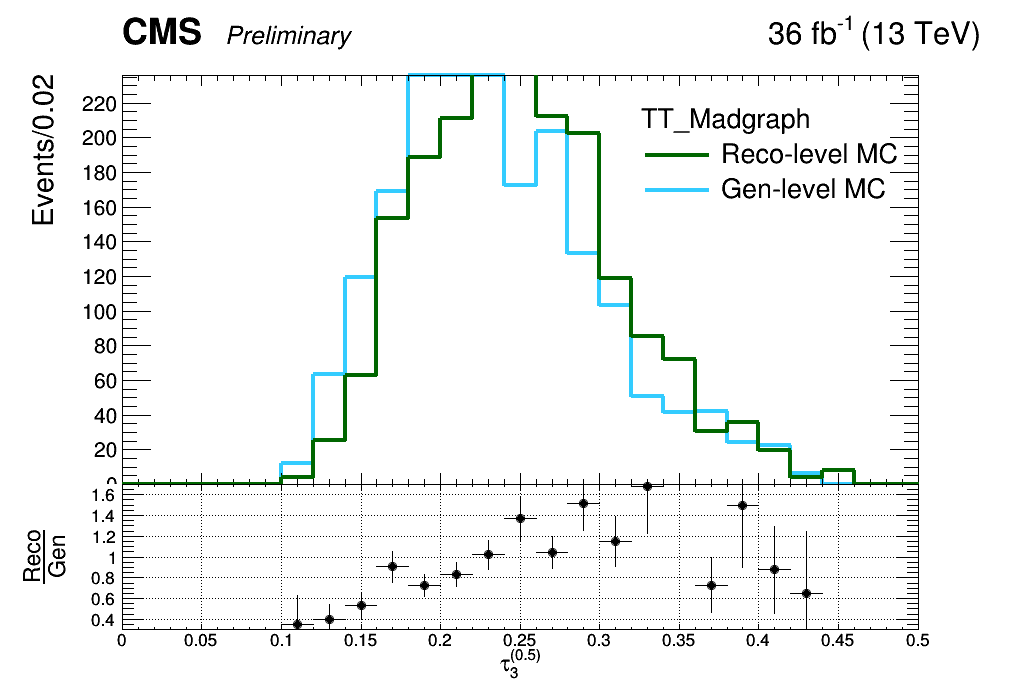

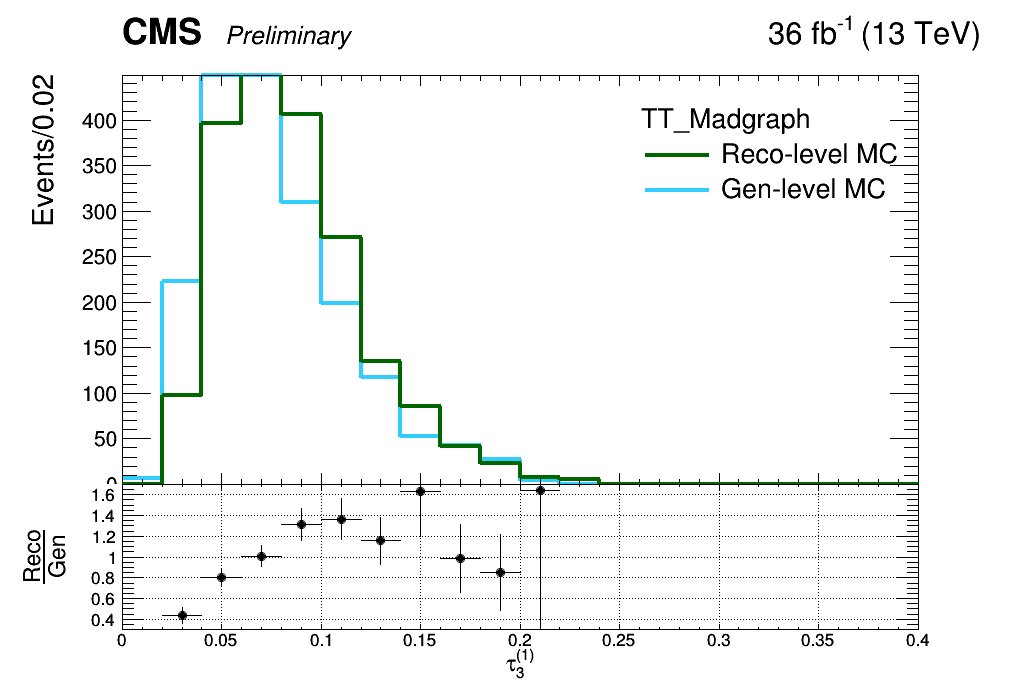

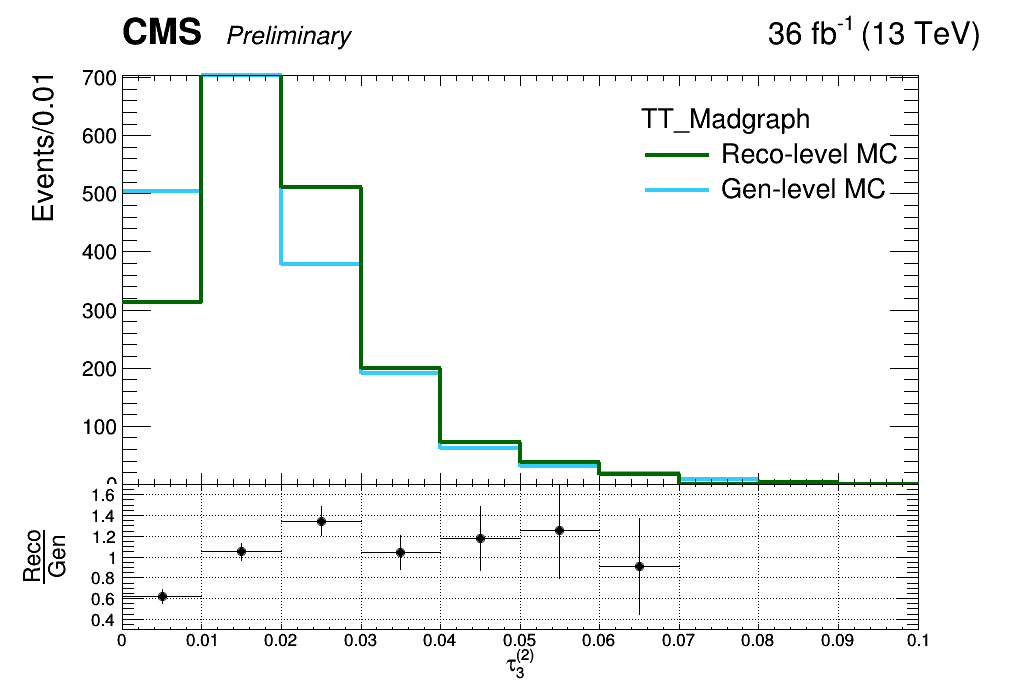

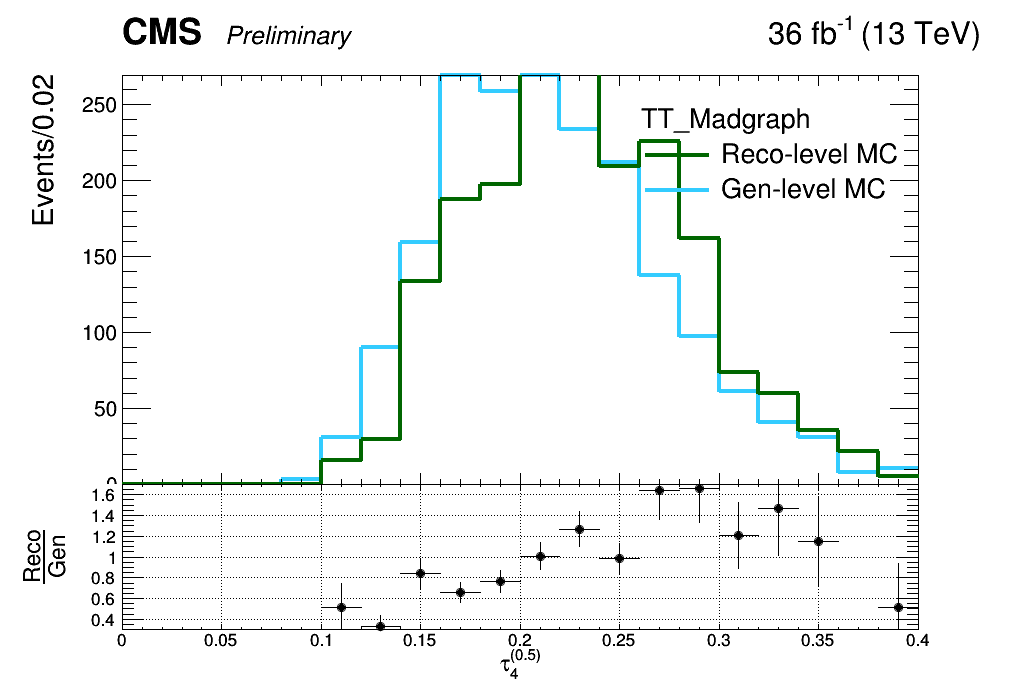

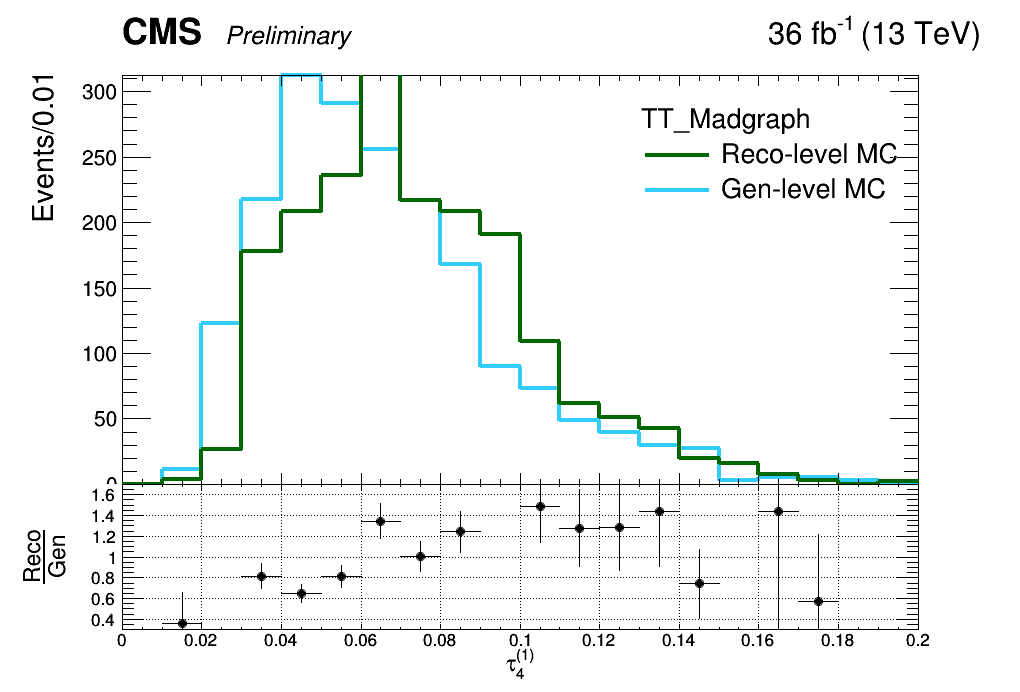

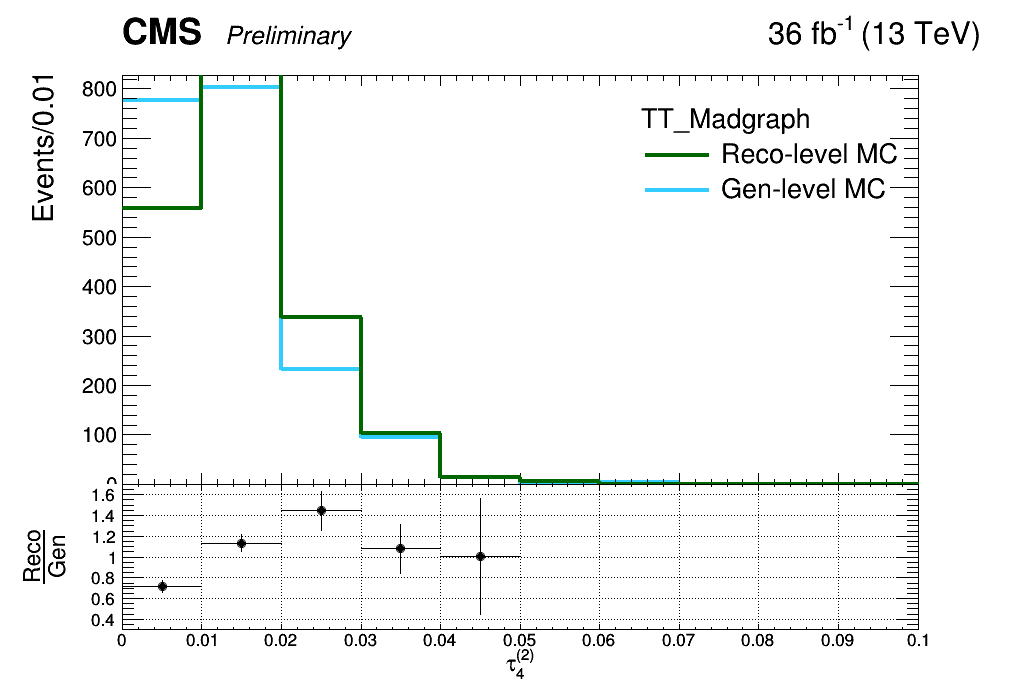

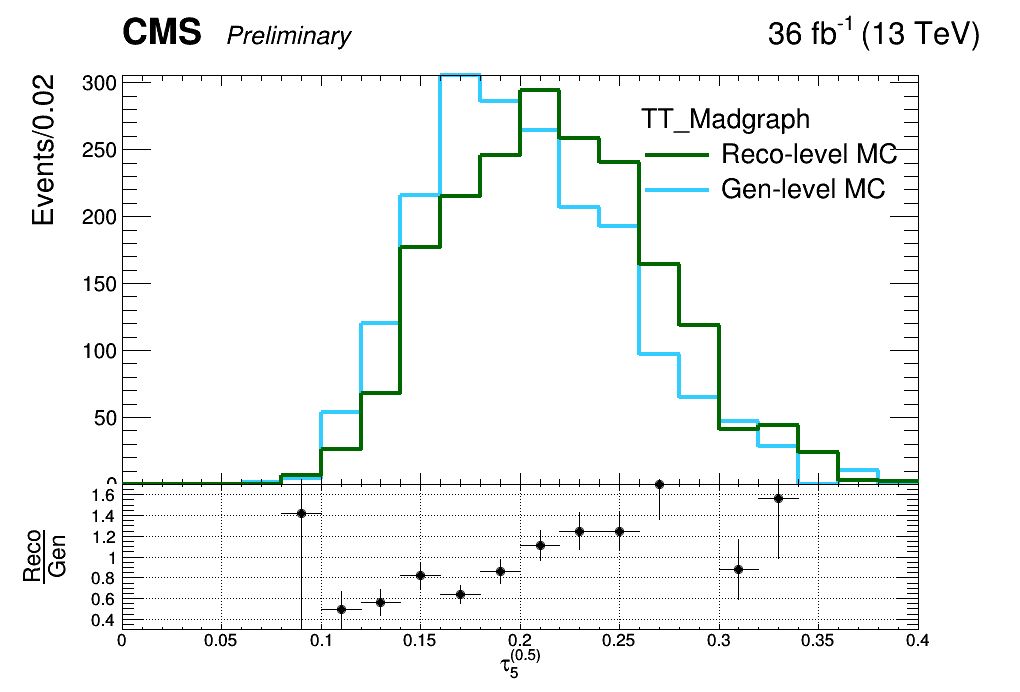

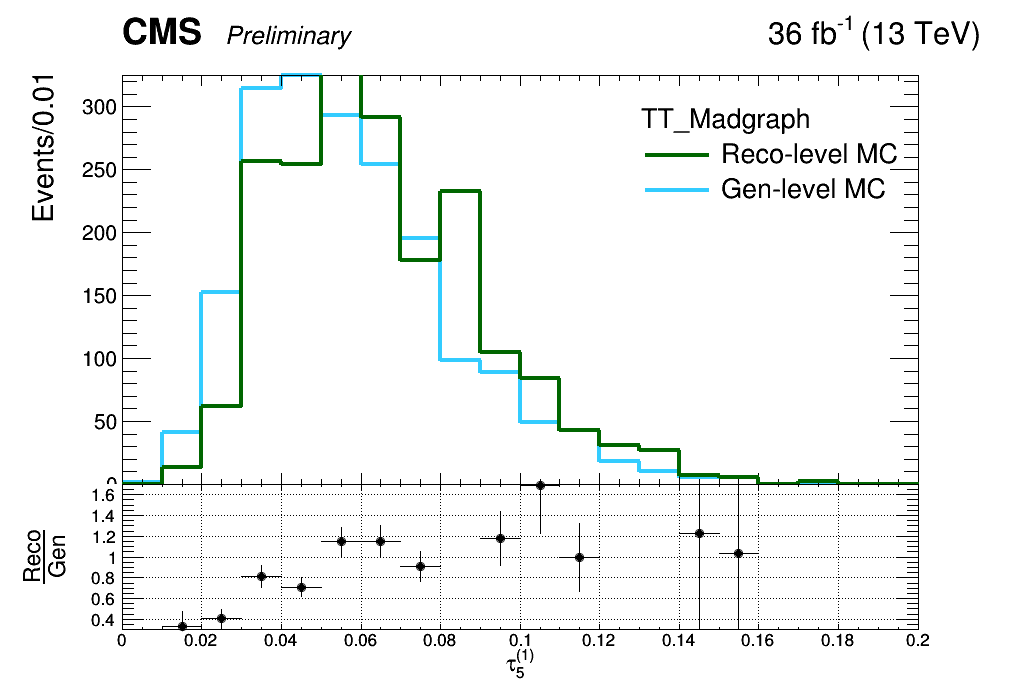

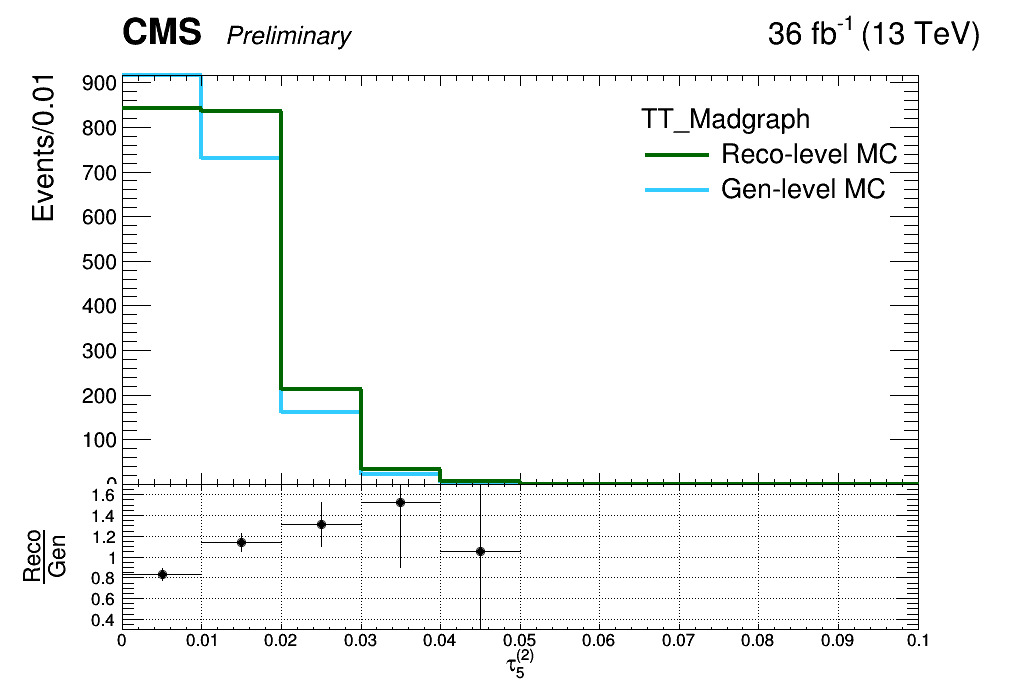

In [12]:
print MC_Compo[0],"W selection"

H_ref = 720; 
W_ref = 1024; 
W = W_ref
H  = H_ref

iPeriod = 4

# references for T, B, L, R
T = 0.08*H_ref
B = 0.12*H_ref 
L = 0.12*W_ref
R = 0.04*W_ref

x1_l = 0.97
y1_l = 0.85

dx_l = 0.35
dy_l = 0.15
x0_l = x1_l-dx_l
y0_l = y1_l-dy_l

canvas=np.zeros((l,),rt.TCanvas)
legend=np.zeros((l,),rt.TLegend)

CName=[]
for i in range(1,l+1):
    CName.append('c'+str(i))
Pad1=[]
Pad2=[]
Mc=[]
Ratio=[]
    
for i in range(l):
    canvas[i] = rt.TCanvas(CName[i],CName[i],0,0,W,H)
    canvas[i].SetFillColor(0)
    canvas[i].SetBorderMode(0)
    canvas[i].SetBorderSize(0)
    canvas[i].SetFrameFillStyle(0)
    canvas[i].SetFrameBorderMode(0)
    canvas[i].SetFrameLineWidth(0)
    canvas[i].SetLeftMargin( L/W )
    canvas[i].SetRightMargin( R/W )
    canvas[i].SetTopMargin( T/H )
    canvas[i].SetBottomMargin( B/H )
    canvas[i].SetTickx(0)
    canvas[i].SetTicky(0)
#canvas.Draw()

    pad1 = rt.TPad("pad1", "pad1", 0, 0.3, 1, 0.95, -1,0,0);
    pad1.SetBottomMargin(0.); #// Upper and lower plot are joined
#pad1.SetGridx();         #// Vertical grid
    pad1.SetBorderMode(0)
    pad1.SetBorderSize(0)
    pad1.SetFrameLineWidth(0)
    pad1.SetFrameBorderMode(0)
    pad1.Draw()           #// Draw the upper pad: pad1
    pad1.cd()
    Pad1.append(pad1)

    Reco_Mad_WSel[i].SetLineColor(rt.kGreen+3)
    Reco_Mad_WSel[i].SetLineWidth(4)
    Reco_Mad_WSel[i].SetLineStyle(1)
    Reco_Mad_WSel[i].SetFillColor(0)
    Reco_Mad_WSel[i].Sumw2()
    Gen_Mad_WSel[i].SetLineColor(rt.kAzure+8)
    Gen_Mad_WSel[i].SetLineWidth(4)
    Gen_Mad_WSel[i].SetLineStyle(1)
    Gen_Mad_WSel[i].SetFillColor(0)
    Gen_Mad_WSel[i].Sumw2()

    #Sepa_WSel[i].SetLineColor(rt.kAzure+8)
    #Sepa_WSel[i].SetFillColor(rt.kAzure+8)
    Gen_Mad_WSel[i].GetYaxis().SetTitle(Title_WSel[i][0])
    Gen_Mad_WSel[i].GetXaxis().SetTitle(Title_WSel[i][2])
    Gen_Mad_WSel[i].GetYaxis().SetTitleOffset(0.7)
    Gen_Mad_WSel[i].GetYaxis().SetTitleSize(0.07)
    Gen_Mad_WSel[i].GetYaxis().SetLabelSize(0.05)
    Gen_Mad_WSel[i].Draw("hist")
    Gen_Mad_WSel[i].SetMaximum(1/1.1*max([Gen_Mad_WSel[i].GetMaximum(),Reco_Mad_WSel[i].GetMaximum()]))
    Reco_Mad_WSel[i].Draw("histsame")

    CMS_lumi.CMS_lumi(canvas[i], iPeriod, iPos)
#    canvas[i].cd()
    
    canvas[i].cd()
    canvas[i].Update()
    canvas[i].RedrawAxis()
    frame = canvas[i].GetFrame()
    frame.Draw()

    pad2 = rt.TPad("pad2","pad2",0,0.0,1,0.3, -1,0,0)
    pad2.SetTopMargin(0)
    pad2.SetGridx()
    pad2.SetGridy()
    pad2.Draw()
    pad2.cd()
    pad2.SetBottomMargin(0.3)
    Pad2.append(pad2)

    ratio = rt.TH1D(Title_WSel[i][1],";;",*Range_WSel[i])
    ratio.GetXaxis().SetTitle(Title_WSel[i][2])
    ratio.Add(Reco_Mad_WSel[i])
    ratio.GetYaxis().CenterTitle(rt.kTRUE)
    ratio.GetXaxis().CenterTitle(rt.kTRUE)
    ratio.GetYaxis().SetRangeUser(0.3,1.7)
    ratio.GetYaxis().SetTitle("#frac{Reco}{Gen}")
    ratio.Sumw2()
    ratio.SetStats(0)
    ratio.Divide(Gen_Mad_WSel[i])
    ratio.GetYaxis().SetLabelSize(0.09)
    ratio.GetXaxis().SetLabelSize(0.09)
    ratio.SetMarkerColor(rt.kBlack)
    ratio.SetMarkerStyle(20)
    ratio.SetLineColor(rt.kBlack)
    ratio.GetYaxis().SetTitleSize(0.12)
    ratio.GetYaxis().SetTitleOffset(0.4)
    ratio.GetXaxis().SetTitleSize(0.12)
    ratio.GetXaxis().SetTitleOffset(0.85)
    Ratio.append(ratio)

    ratio.Draw("EP")
    canvas[i].cd()

    if i is 1:
        legend[i] =  rt.TLegend(x0_l-0.4,y0_l,x1_l-0.4,y1_l,"TT_Madgraph")
    else:
        legend[i] =  rt.TLegend(x0_l,y0_l,x1_l,y1_l,"TT_Madgraph")
    legend[i].AddEntry(Reco_Mad_WSel[i],"Reco-level MC","l")
    legend[i].AddEntry(Gen_Mad_WSel[i],"Gen-level MC","l")
    legend[i].SetTextFont(42)
    legend[i].SetTextAngle(0)
    legend[i].SetTextColor(rt.kBlack)    
    #legend.SetTextSize(0.05)    
    legend[i].SetTextAlign(12) 
    legend[i].SetBorderSize(0)
    legend[i].SetFillStyle(0)
    #legend.SetLinewdith(0)
    legend[i].Draw()


    canvas[i].Update()
    canvas[i].Draw()
    canvas[i].Print("/t3home/gelliu/Unfolding_Substructure/Figures/GenRecoComparison_OldSamples/TT_madgraph_WSel/"+Objects_WSel[i]+".png")

# TT_madgraph top selection

TT_powheg top selection


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Info in <TCanvas::Print>: png file /t3home/gelliu/Unfolding_Substructure/Figures/GenRecoComparison_OldSamples/TT_madgraph_topSel/respJetTau21_nom_topSel.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2
Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Info in <TCanvas::Print>: png file /t3home/gelliu/Unfolding_Substructure/Figures/GenRecoComparison_OldSamples/TT_madgraph_topSel/respJet_tau_0p5_0_nom_topSel.png has been created
Warning in <TCanvas::Constructor>: Dele

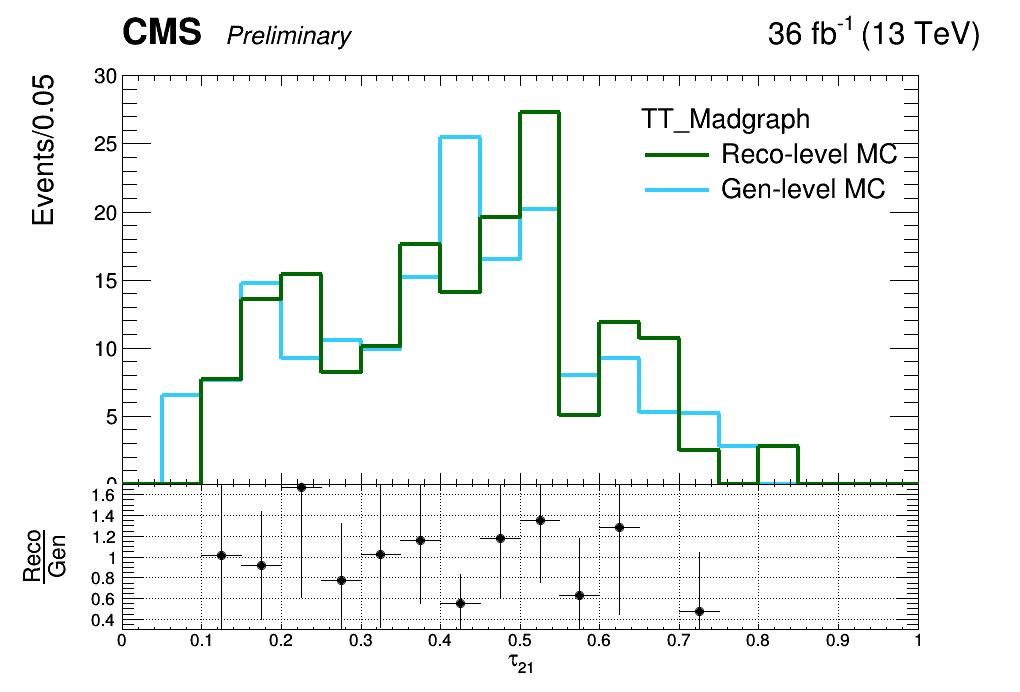

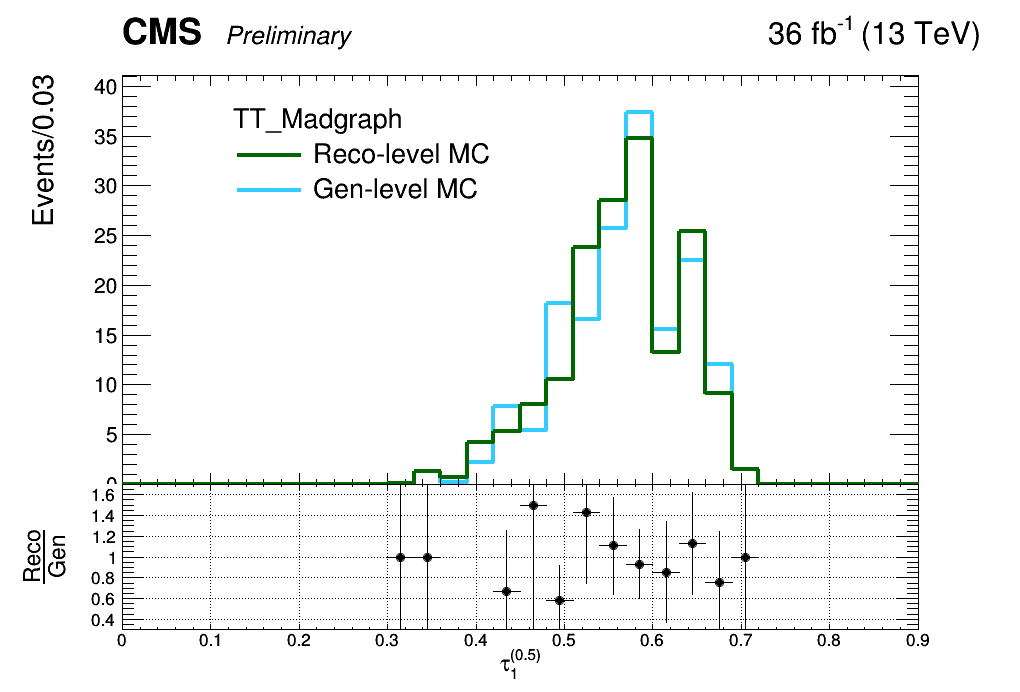

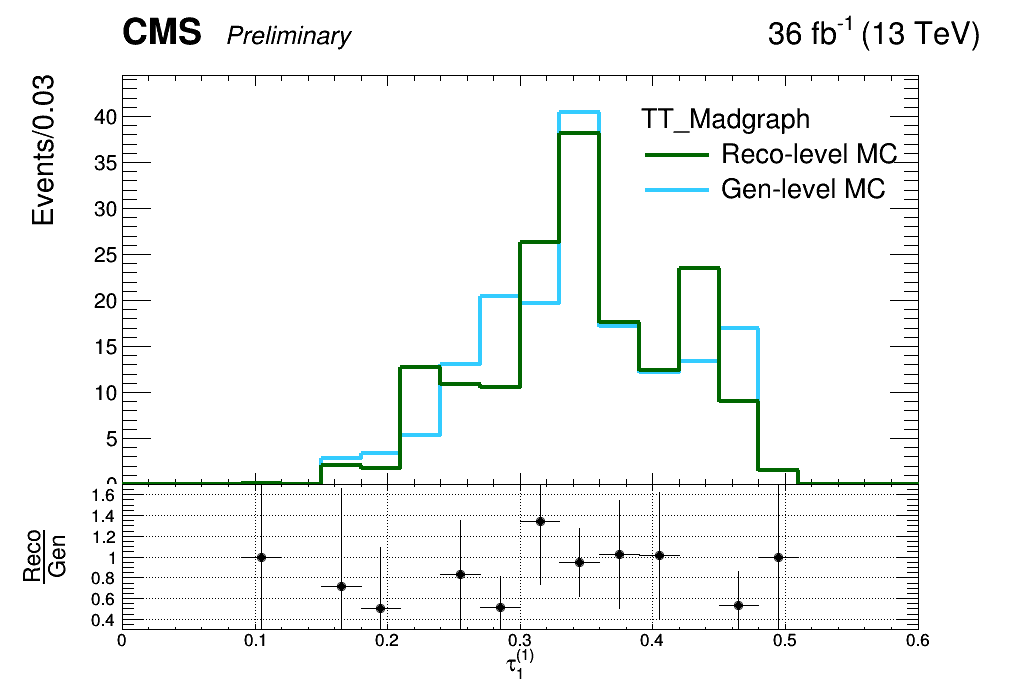

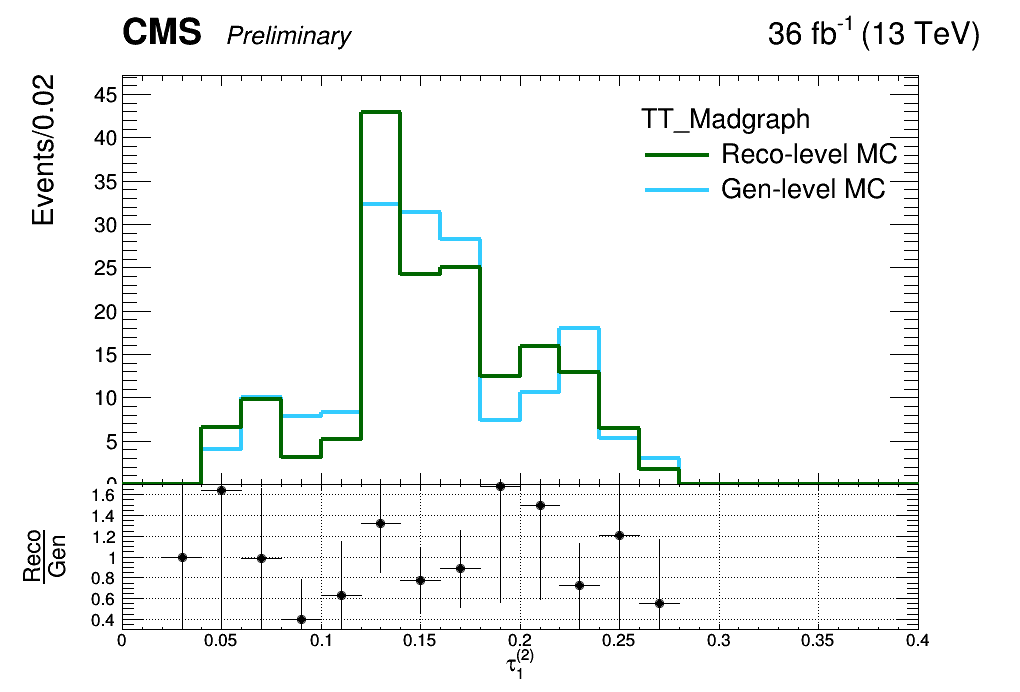

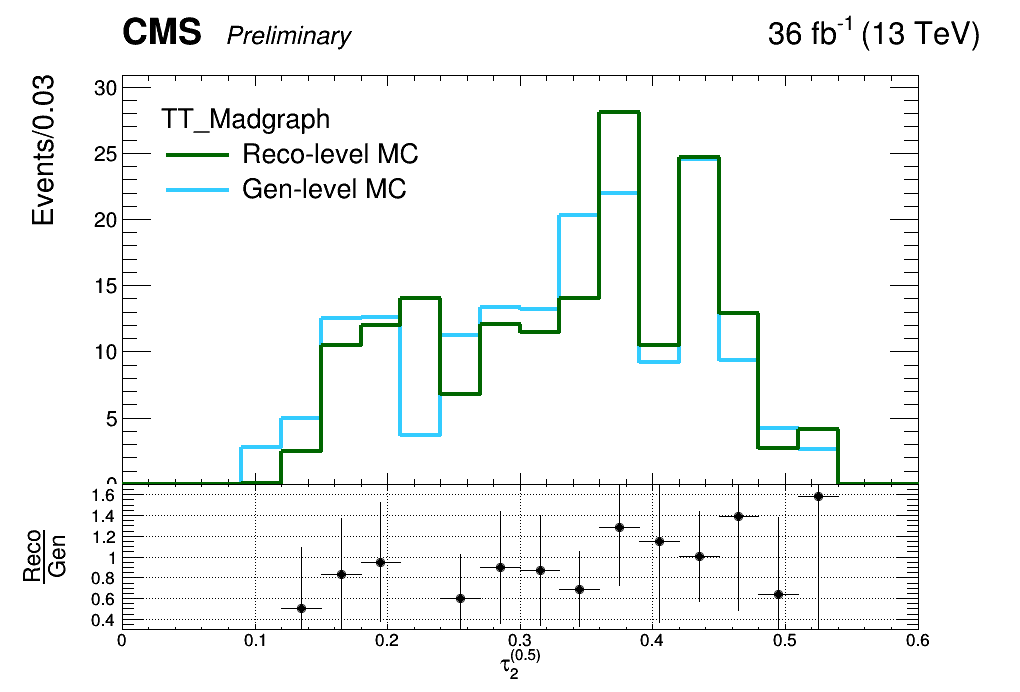

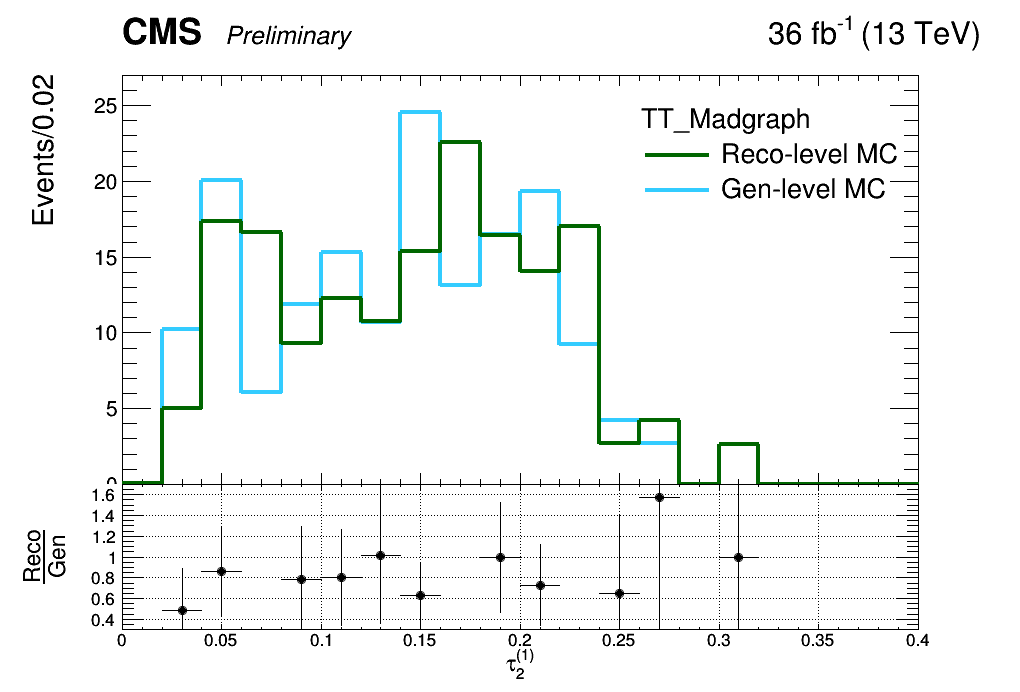

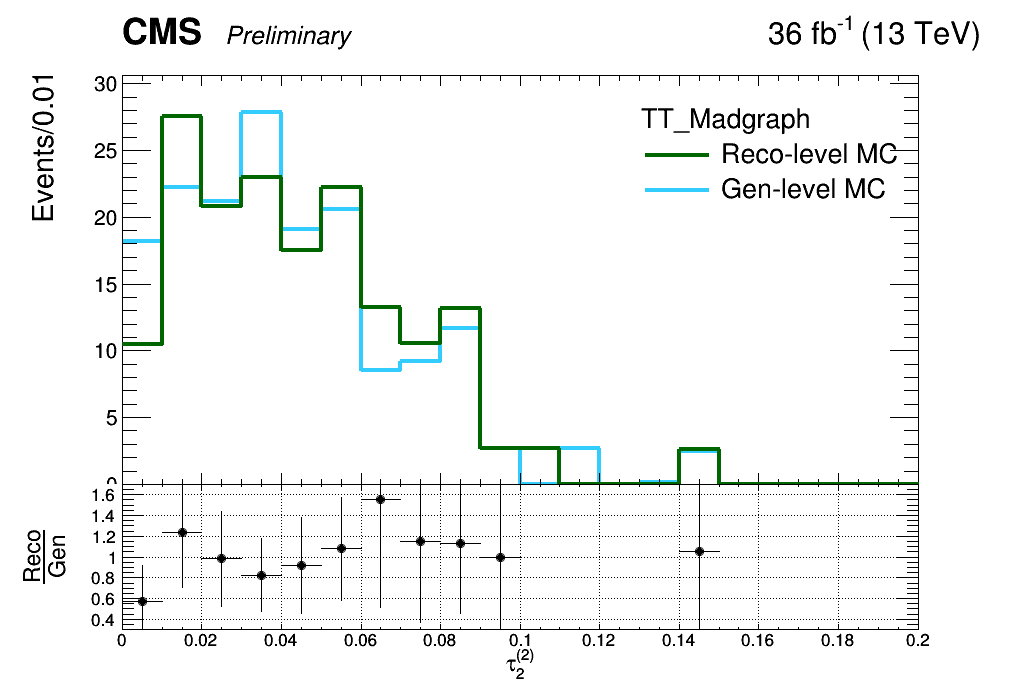

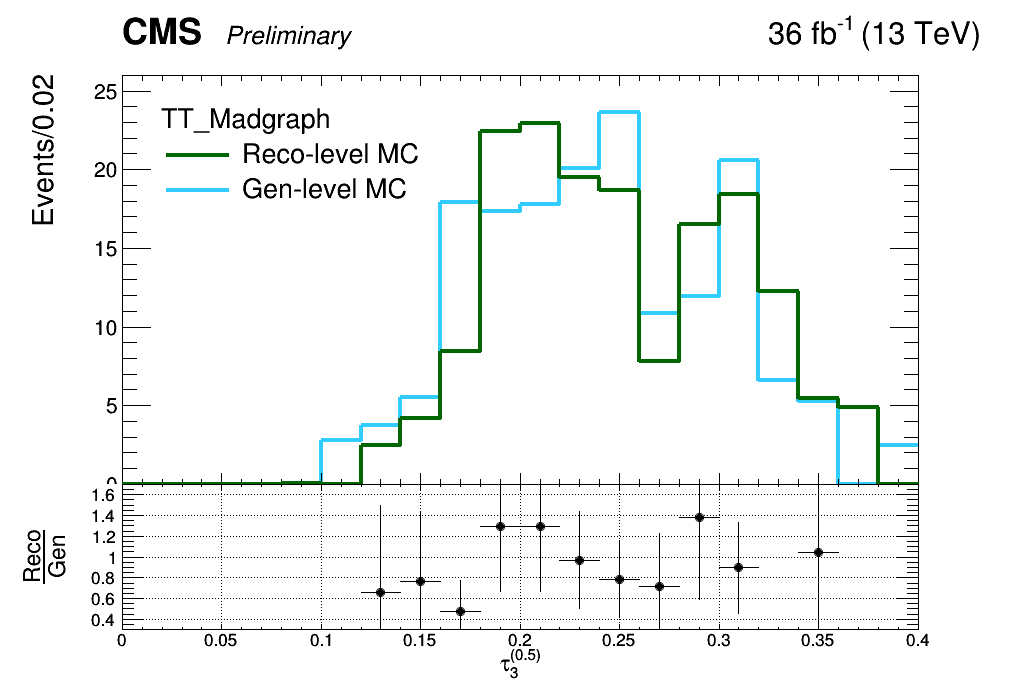

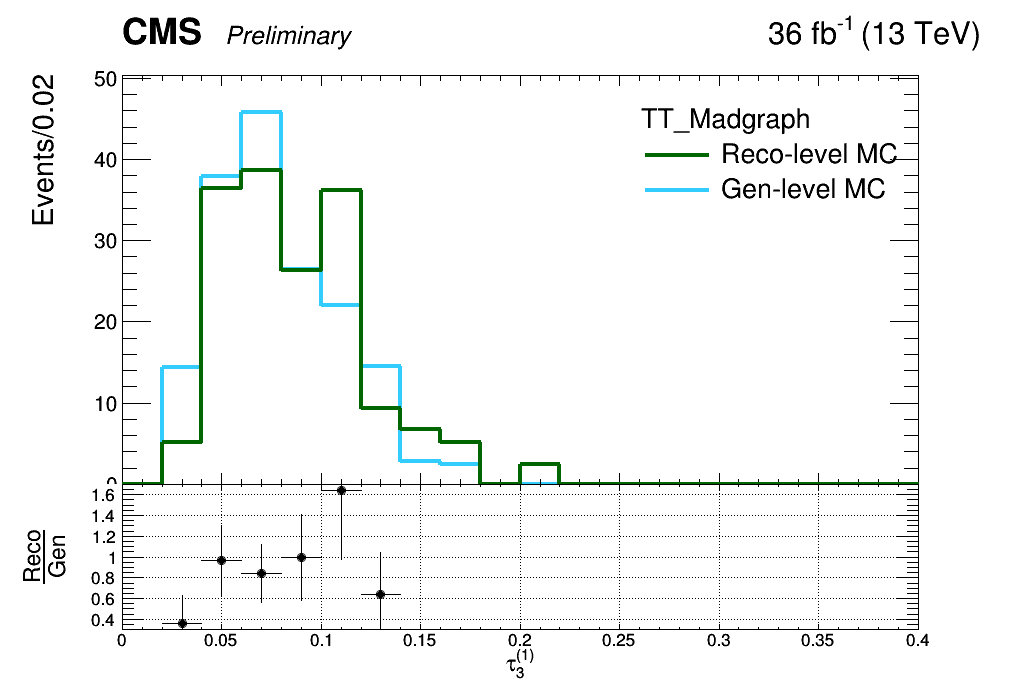

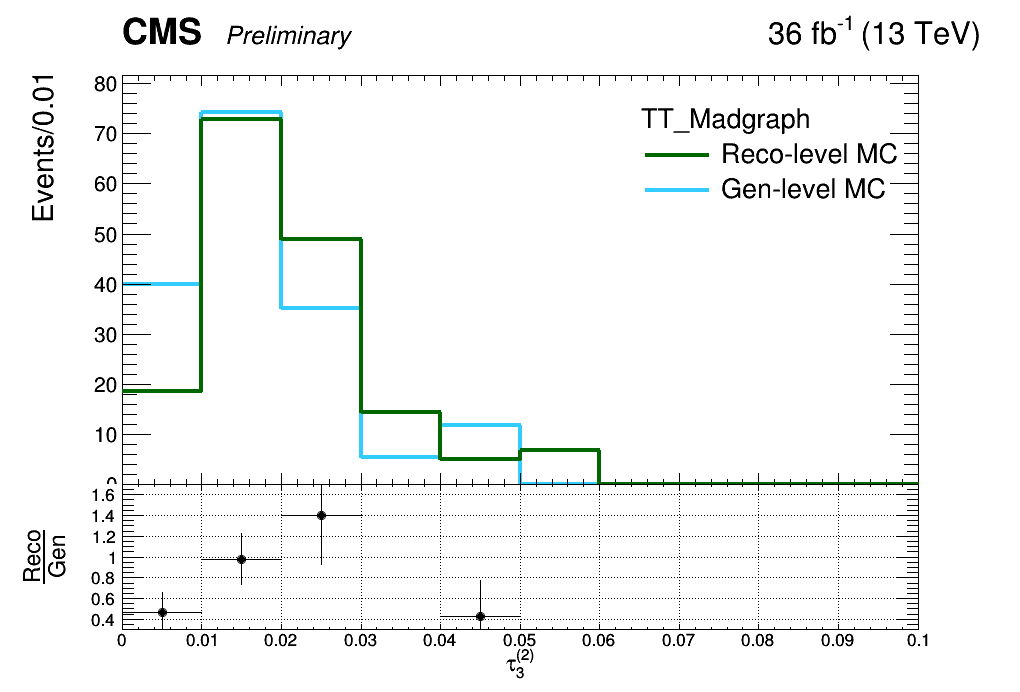

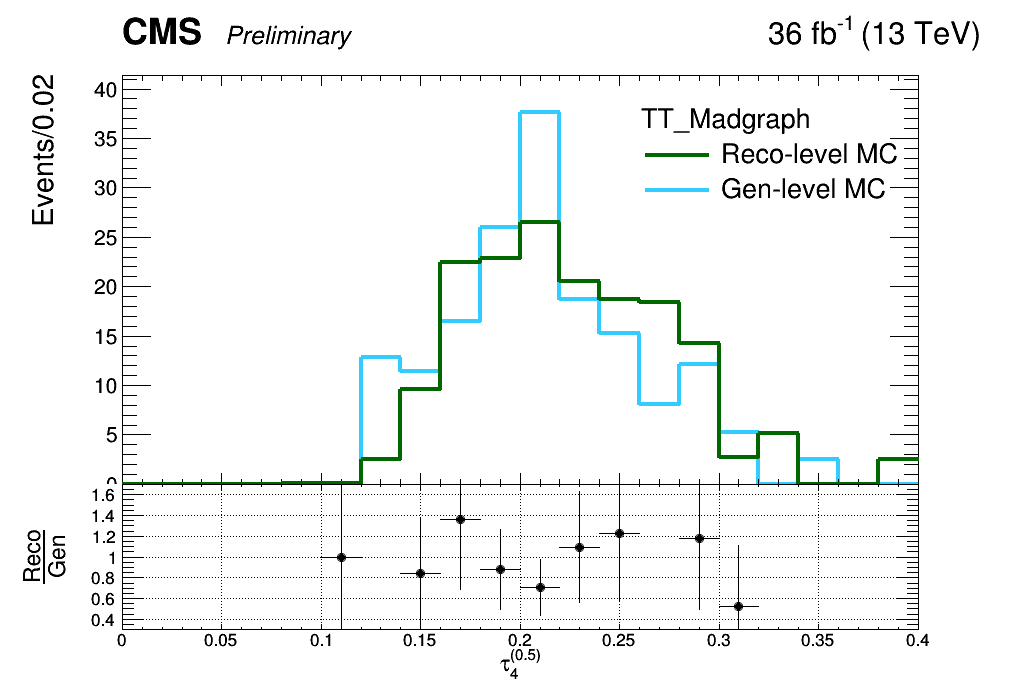

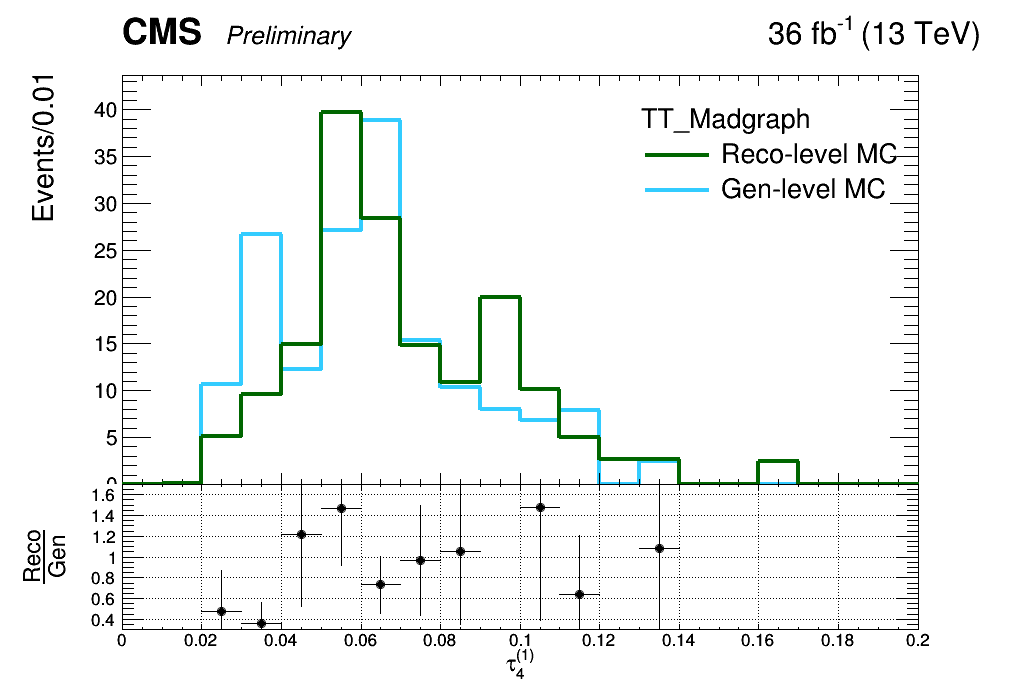

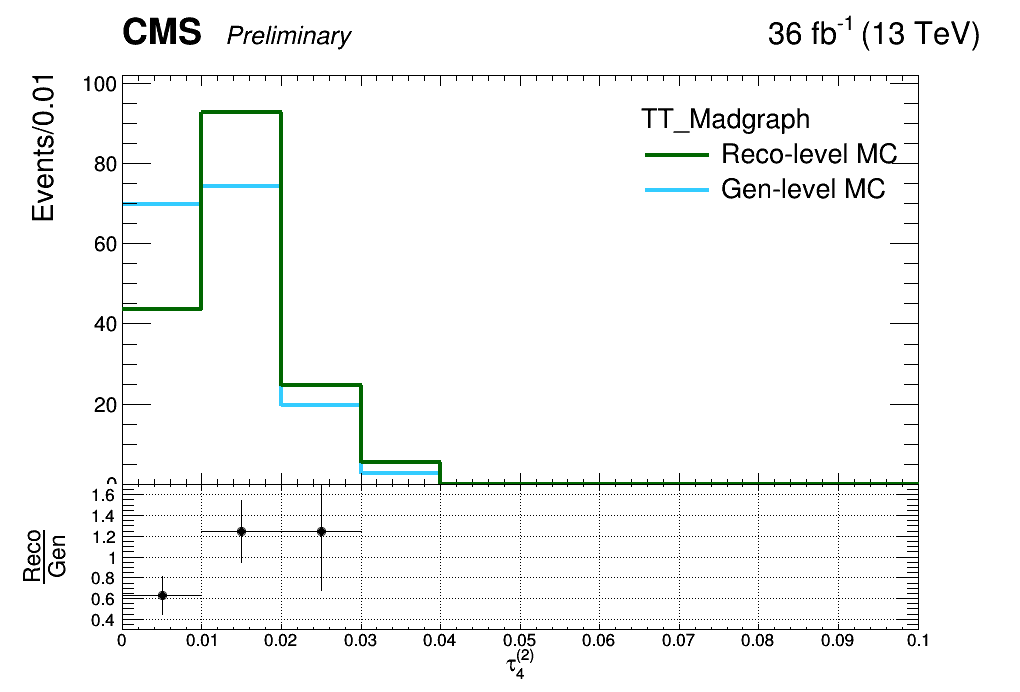

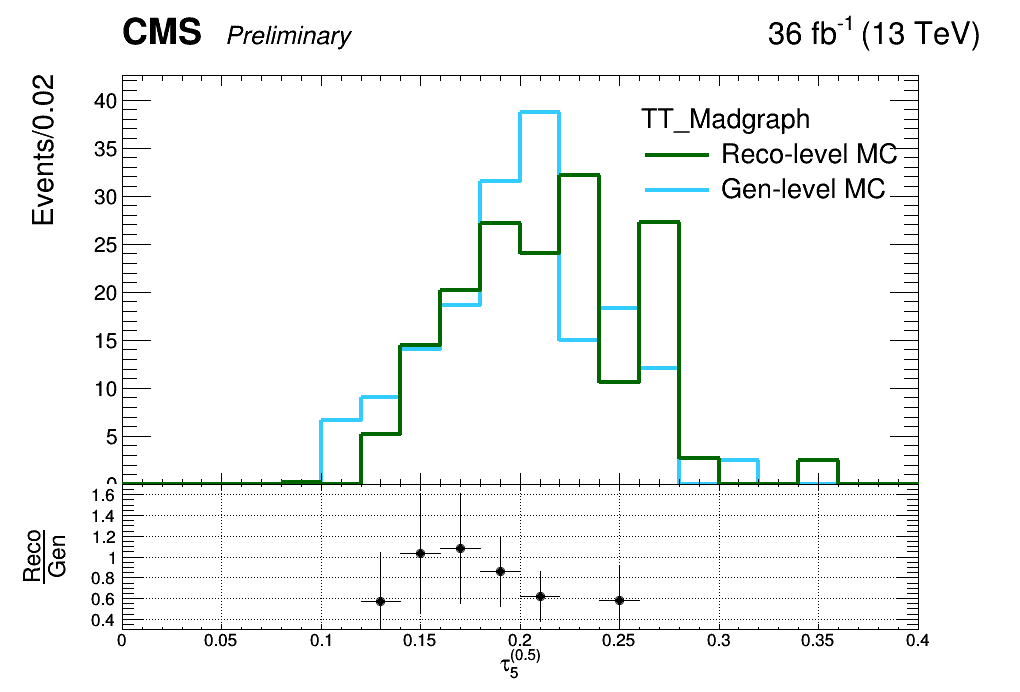

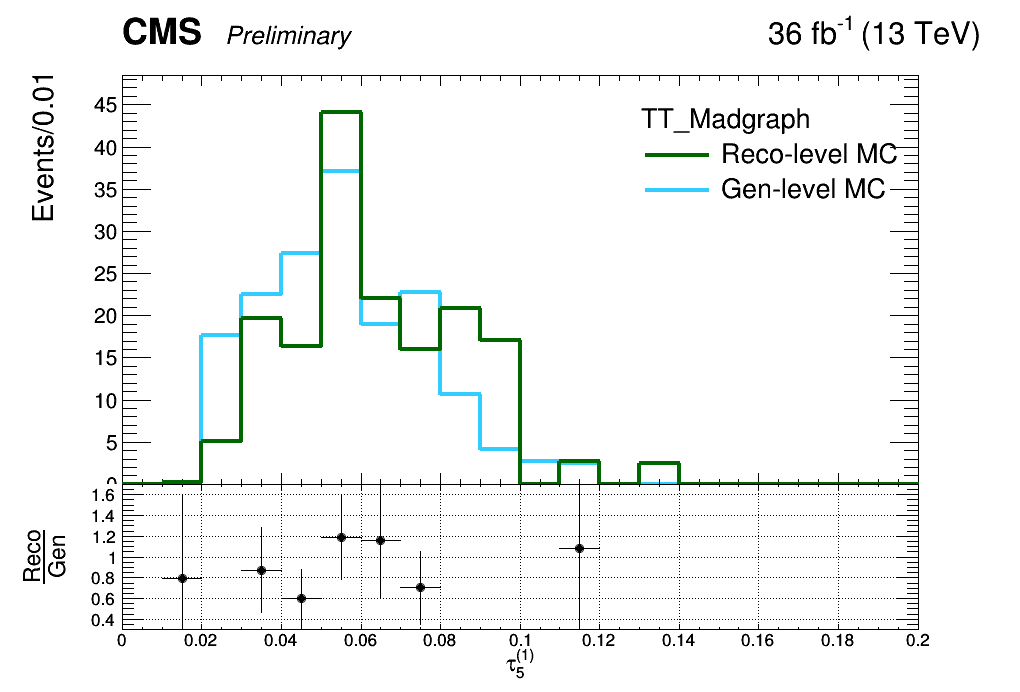

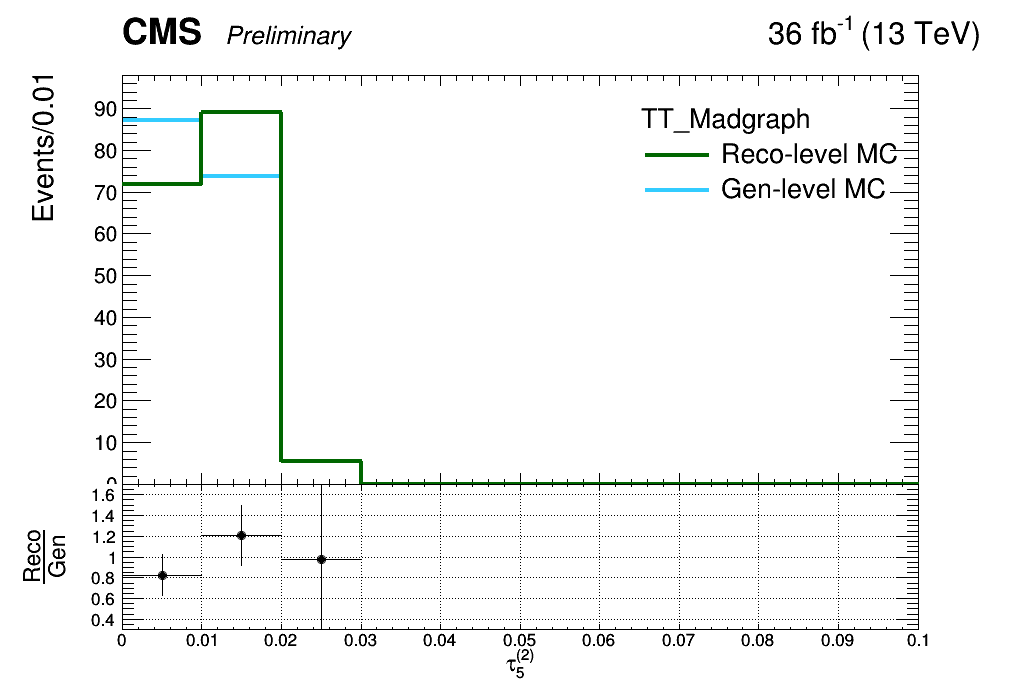

In [13]:
print MC_Compo[1],"top selection"

H_ref = 720; 
W_ref = 1024; 
W = W_ref
H  = H_ref

iPeriod = 4

# references for T, B, L, R
T = 0.08*H_ref
B = 0.12*H_ref 
L = 0.12*W_ref
R = 0.04*W_ref

x1_l = 0.97
y1_l = 0.85

dx_l = 0.35
dy_l = 0.15
x0_l = x1_l-dx_l
y0_l = y1_l-dy_l

canvas=np.zeros((l,),rt.TCanvas)
legend=np.zeros((l,),rt.TLegend)

CName=[]
for i in range(1,l+1):
    CName.append('c'+str(i))
Pad1=[]
Pad2=[]
Mc=[]
Ratio=[]
    
for i in range(l):
    canvas[i] = rt.TCanvas(CName[i],CName[i],0,0,W,H)
    canvas[i].SetFillColor(0)
    canvas[i].SetBorderMode(0)
    canvas[i].SetBorderSize(0)
    canvas[i].SetFrameFillStyle(0)
    canvas[i].SetFrameBorderMode(0)
    canvas[i].SetFrameLineWidth(0)
    canvas[i].SetLeftMargin( L/W )
    canvas[i].SetRightMargin( R/W )
    canvas[i].SetTopMargin( T/H )
    canvas[i].SetBottomMargin( B/H )
    canvas[i].SetTickx(0)
    canvas[i].SetTicky(0)
#canvas.Draw()

    pad1 = rt.TPad("pad1", "pad1", 0, 0.3, 1, 0.95, -1,0,0);
    pad1.SetBottomMargin(0.); #// Upper and lower plot are joined
#pad1.SetGridx();         #// Vertical grid
    pad1.SetBorderMode(0)
    pad1.SetBorderSize(0)
    pad1.SetFrameLineWidth(0)
    pad1.SetFrameBorderMode(0)
    pad1.Draw()           #// Draw the upper pad: pad1
    pad1.cd()
    Pad1.append(pad1)

    Reco_Mad_topSel[i].SetLineColor(rt.kGreen+3)
    Reco_Mad_topSel[i].SetLineWidth(4)
    Reco_Mad_topSel[i].SetLineStyle(1)
    Reco_Mad_topSel[i].SetFillColor(0)
    Reco_Mad_topSel[i].Sumw2()
    Gen_Mad_topSel[i].SetLineColor(rt.kAzure+8)
    Gen_Mad_topSel[i].SetLineWidth(4)
    Gen_Mad_topSel[i].SetLineStyle(1)
    Gen_Mad_topSel[i].SetFillColor(0)
    Gen_Mad_topSel[i].Sumw2()

    #Sepa_topSel[i].SetLineColor(rt.kAzure+8)
    #Sepa_topSel[i].SetFillColor(rt.kAzure+8)
    Gen_Mad_topSel[i].GetYaxis().SetTitle(Title_topSel[i][0])
    Gen_Mad_topSel[i].GetXaxis().SetTitle(Title_topSel[i][2])
    Gen_Mad_topSel[i].GetYaxis().SetTitleOffset(0.7)
    Gen_Mad_topSel[i].GetYaxis().SetTitleSize(0.07)
    Gen_Mad_topSel[i].GetYaxis().SetLabelSize(0.05)
    Gen_Mad_topSel[i].Draw("hist")
    Gen_Mad_topSel[i].SetMaximum(1.1*max([Gen_Mad_topSel[i].GetMaximum(),Reco_Mad_topSel[i].GetMaximum()]))
    Reco_Mad_topSel[i].Draw("histsame")

    CMS_lumi.CMS_lumi(canvas[i], iPeriod, iPos)
#    canvas[i].cd()
    
    canvas[i].cd()
    canvas[i].Update()
    canvas[i].RedrawAxis()
    frame = canvas[i].GetFrame()
    frame.Draw()

    pad2 = rt.TPad("pad2","pad2",0,0.0,1,0.3, -1,0,0)
    pad2.SetTopMargin(0)
    pad2.SetGridx()
    pad2.SetGridy()
    pad2.Draw()
    pad2.cd()
    pad2.SetBottomMargin(0.3)
    Pad2.append(pad2)

    ratio = rt.TH1D(Title_topSel[i][1],";;",*Range_topSel[i])
    ratio.GetXaxis().SetTitle(Title_topSel[i][2])
    ratio.Add(Reco_Mad_topSel[i])
    ratio.GetYaxis().CenterTitle(rt.kTRUE)
    ratio.GetXaxis().CenterTitle(rt.kTRUE)
    ratio.GetYaxis().SetRangeUser(0.3,1.7)
    ratio.GetYaxis().SetTitle("#frac{Reco}{Gen}")
    ratio.Sumw2()
    ratio.SetStats(0)
    ratio.Divide(Gen_Mad_topSel[i])
    ratio.GetYaxis().SetLabelSize(0.09)
    ratio.GetXaxis().SetLabelSize(0.09)
    ratio.SetMarkerColor(rt.kBlack)
    ratio.SetMarkerStyle(20)
    ratio.SetLineColor(rt.kBlack)
    ratio.GetYaxis().SetTitleSize(0.12)
    ratio.GetYaxis().SetTitleOffset(0.4)
    ratio.GetXaxis().SetTitleSize(0.12)
    ratio.GetXaxis().SetTitleOffset(0.85)
    Ratio.append(ratio)

    ratio.Draw("EP")
    canvas[i].cd()

    if i is 1 :
        legend[i] =  rt.TLegend(x0_l-0.4,y0_l,x1_l-0.4,y1_l,"TT_Madgraph")
    elif i is 4 or i is 7:
        legend[i] =  rt.TLegend(x0_l-0.47,y0_l,x1_l-0.47,y1_l,"TT_Madgraph")
    else:
        legend[i] =  rt.TLegend(x0_l,y0_l,x1_l,y1_l,"TT_Madgraph")
    legend[i].AddEntry(Reco_Mad_topSel[i],"Reco-level MC","l")
    legend[i].AddEntry(Gen_Mad_topSel[i],"Gen-level MC","l")
    legend[i].SetTextFont(42)
    legend[i].SetTextAngle(0)
    legend[i].SetTextColor(rt.kBlack)    
    #legend.SetTextSize(0.05)    
    legend[i].SetTextAlign(12) 
    legend[i].SetBorderSize(0)
    legend[i].SetFillStyle(0)
    #legend.SetLinewdith(0)
    legend[i].Draw()


    canvas[i].Update()
    canvas[i].Draw()
    canvas[i].Print("/t3home/gelliu/Unfolding_Substructure/Figures/GenRecoComparison_OldSamples/TT_madgraph_topSel/"+Objects_topSel[i]+".png")